## Connect with Me!
#######################################################################

######### [GitHub](https://github.com/PrinceKhunt16)
######### [LinkedIn](https://www.linkedin.com/in/prince-khunt-linked-in/)
######### [TwittEr](https://x.com/princekhunt19)
######### [KaGGle](https://www.kaggle.com/princekhunt19)
#########

#######################################################################

## 1. Packages Importing & Data Loading

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [196]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [197]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [198]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [199]:
train.shape

(891, 12)

In [200]:
test.shape

(418, 11)

In [201]:
def load(dataframe):
    df = dataframe.copy()
    return df

In [202]:
df_ = pd.concat([train, test], ignore_index=False)

In [203]:
df = load(df_) 
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
136,1028,NaN,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
756,757,0.0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
53,54,1.0,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S


In [204]:
df.shape

(1309, 12)

## 2. Starting to Cleaning and Reading Data

In [205]:
def details_about_df(dataframe):
    print("##### Shape")
    print(dataframe.shape)
    print("##### Columns")
    print(dataframe.columns)
    print("##### Index")
    print(dataframe.index)
    print("##### NA")
    print(dataframe.isnull().values.any())
    print("##### NA Sum - Ratio")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(), "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("##### Quantiles")
    print(dataframe.describe().T)

details_about_df(df)

##### Shape
(1309, 12)
##### Columns
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
##### Index
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
      dtype='int64', length=1309)
##### NA
True
##### NA Sum - Ratio
             na_sum     ratio
PassengerId       0  0.000000
Survived        418  0.319328
Pclass            0  0.000000
Name              0  0.000000
Sex               0  0.000000
Age             263  0.200917
SibSp             0  0.000000
Parch             0  0.000000
Ticket            0  0.000000
Fare              1  0.000764
Cabin          1014  0.774637
Embarked          2  0.001528
##### Quantiles
              count        mean         std   min       25%       50%  \
PassengerId  1309.0  655.000000  378.020061  1.00  328.0000  655.0000   
Survived      891.0    0.383838    0.486592  0.00  

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [207]:
# Capturing numerical and categorical data

def fetch_col_names(dataframe):
    # Categorical columns: columns with object dtype
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']

    # Numerical columns: columns with non-object dtype
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    return cat_cols, num_cols

In [208]:
ids = ['Survived']
cat_cols, num_cols = fetch_col_names(df)

In [209]:
print(f"Categoric columns: {len(cat_cols)}") # Categorical columns
print(f"Numeric columns: {len(num_cols)}") # Numeric columns

Categoric columns: 5
Numeric columns: 7


In [210]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [211]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [212]:
df[cat_cols]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
416,"Ware, Mr. Frederick",male,359309,NaN,S


In [213]:
df[num_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
413,1305,NaN,3,NaN,0,0,8.0500
414,1306,NaN,1,39.0,0,0,108.9000
415,1307,NaN,3,38.5,0,0,7.2500
416,1308,NaN,3,NaN,0,0,8.0500


## 3. Categorical Variable

In [214]:
def cat_details(dataframe, col_name, plot=False):
    # Count and ratio of unique values
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length

    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio}))
    print(f"\n{col_name} has {dataframe[col_name].nunique()} unique values.")
    print(f"{bottom_border}\n")
    
    # Plot count plot if plot is True
    if plot:
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.title(f"Count Plot for {col_name}")
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


##################################################
################## Name Details ##################
                                                    Name  Ratio (%)
Name                                                               
Connolly, Miss. Kate                                   2   0.152788
Kelly, Mr. James                                       2   0.152788
Braund, Mr. Owen Harris                                1   0.076394
Johnson, Master. Harold Theodor                        1   0.076394
Gustafsson, Mr. Alfred Ossian                          1   0.076394
...                                                  ...        ...
Carter, Miss. Lucile Polk                              1   0.076394
Silvey, Mr. William Baird                              1   0.076394
Kallio, Mr. Nikolai Erland                             1   0.076394
Louch, Mrs. Charles Alexander (Alice Adelaide S...     1   0.076394
Peter, Master. Michael J                               1   0.076394

[1307 rows x

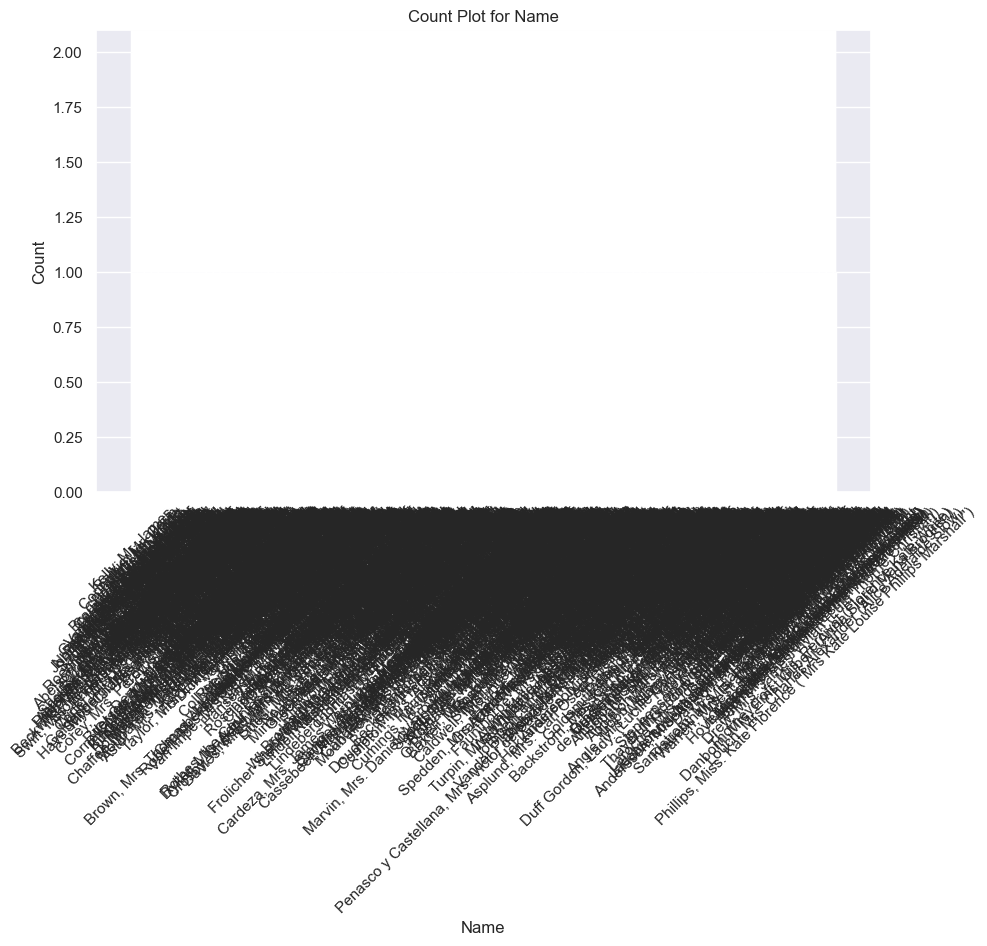


##################################################
################## Sex Details ###################
        Sex  Ratio (%)
Sex                   
male    843  64.400306
female  466  35.599694

Sex has 2 unique values.
##################################################



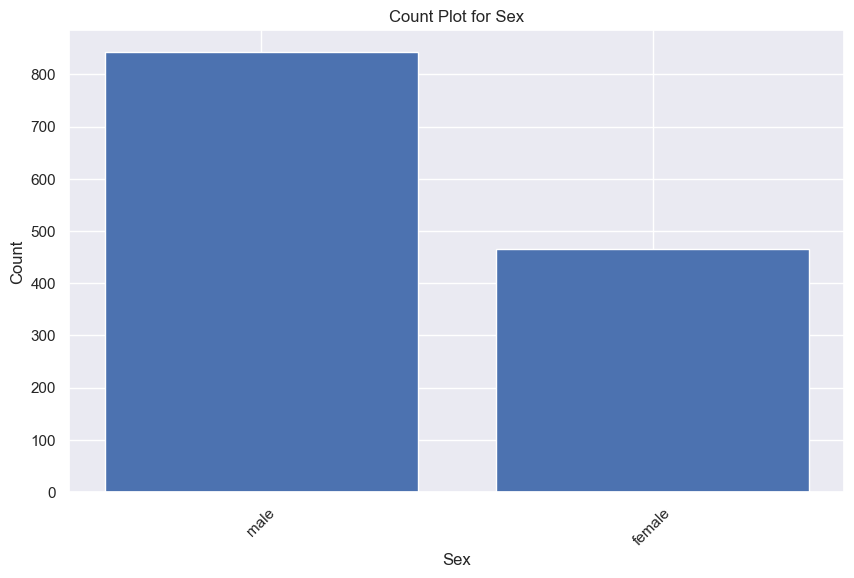


##################################################
################# Ticket Details #################
              Ticket  Ratio (%)
Ticket                         
CA. 2343          11   0.840336
CA 2144            8   0.611154
1601               8   0.611154
PC 17608           7   0.534759
S.O.C. 14879       7   0.534759
...              ...        ...
113792             1   0.076394
36209              1   0.076394
323592             1   0.076394
315089             1   0.076394
359309             1   0.076394

[929 rows x 2 columns]

Ticket has 929 unique values.
##################################################



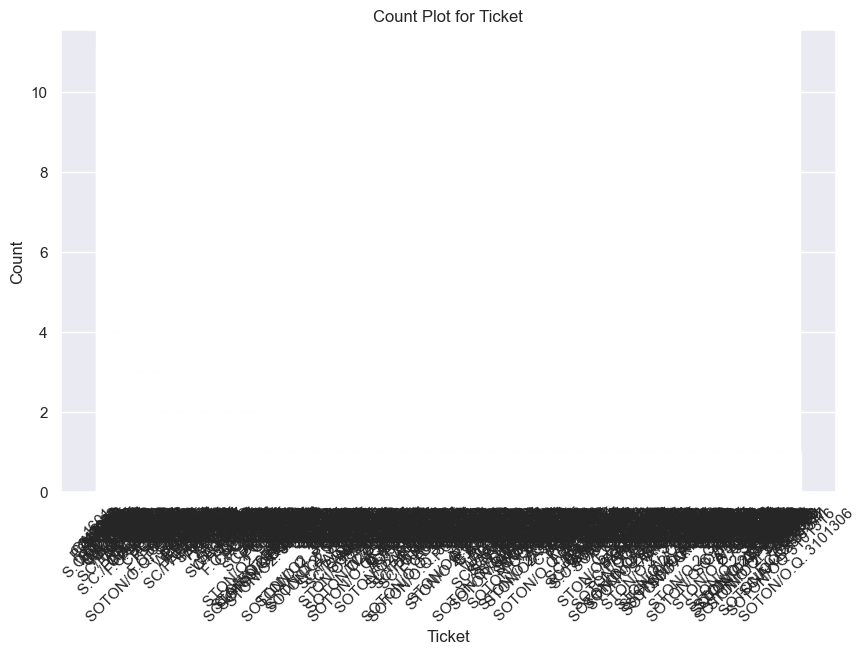


##################################################
################# Cabin Details ##################
                 Cabin  Ratio (%)
Cabin                            
C23 C25 C27          6   0.458365
G6                   5   0.381971
B57 B59 B63 B66      5   0.381971
C22 C26              4   0.305577
F33                  4   0.305577
...                ...        ...
A14                  1   0.076394
E63                  1   0.076394
E12                  1   0.076394
E38                  1   0.076394
C105                 1   0.076394

[186 rows x 2 columns]

Cabin has 186 unique values.
##################################################



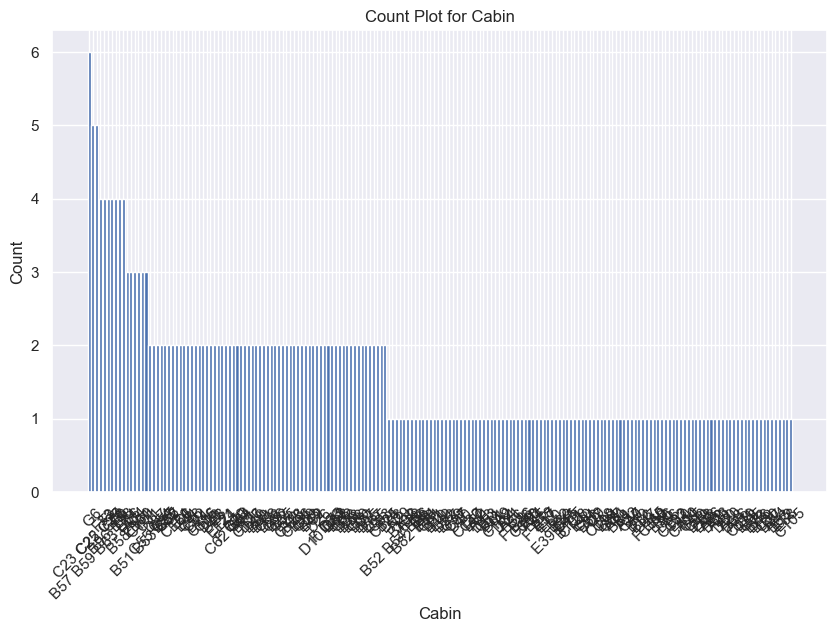


##################################################
################ Embarked Details ################
          Embarked  Ratio (%)
Embarked                     
S              914  69.824293
C              270  20.626432
Q              123   9.396486

Embarked has 3 unique values.
##################################################



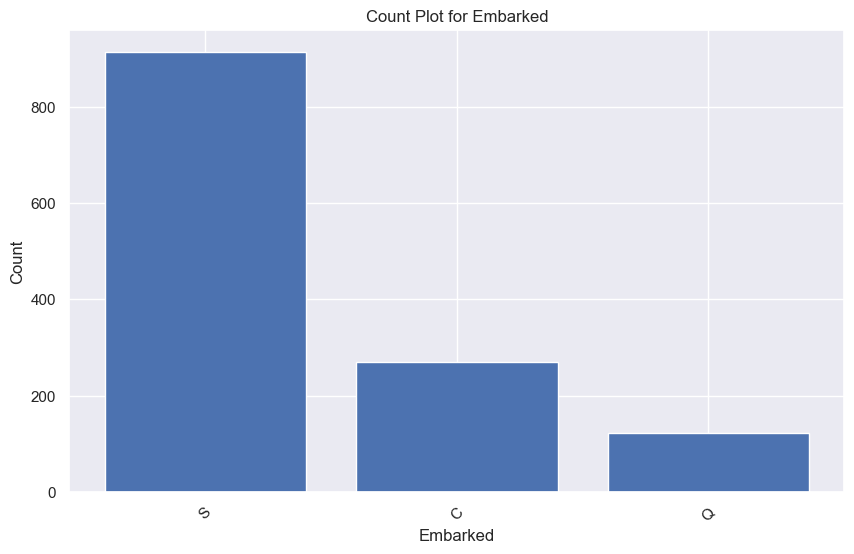

In [215]:
for col in cat_cols:
    cat_details(df, col, plot=True)

In [216]:
# Removing non important columns: Name, Ticket, Cabin

non_important_cat_cols = ['Name', 'Ticket', 'Cabin']

def remove_non_important_cat_cols():
    global df
    for col in non_important_cat_cols:
        cat_cols.remove(col)
    
    df = df.drop(columns=non_important_cat_cols)

In [217]:
remove_non_important_cat_cols()

In [218]:
cat_cols

['Sex', 'Embarked']

## 4. Numerical Variable

In [219]:
def num_details(dataframe, col_name, plot=False, quantiles=[0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block=True)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length
    
    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(dataframe[col_name].describe(percentiles=quantiles).T, end="\n\n")
    print(f"{bottom_border}\n")

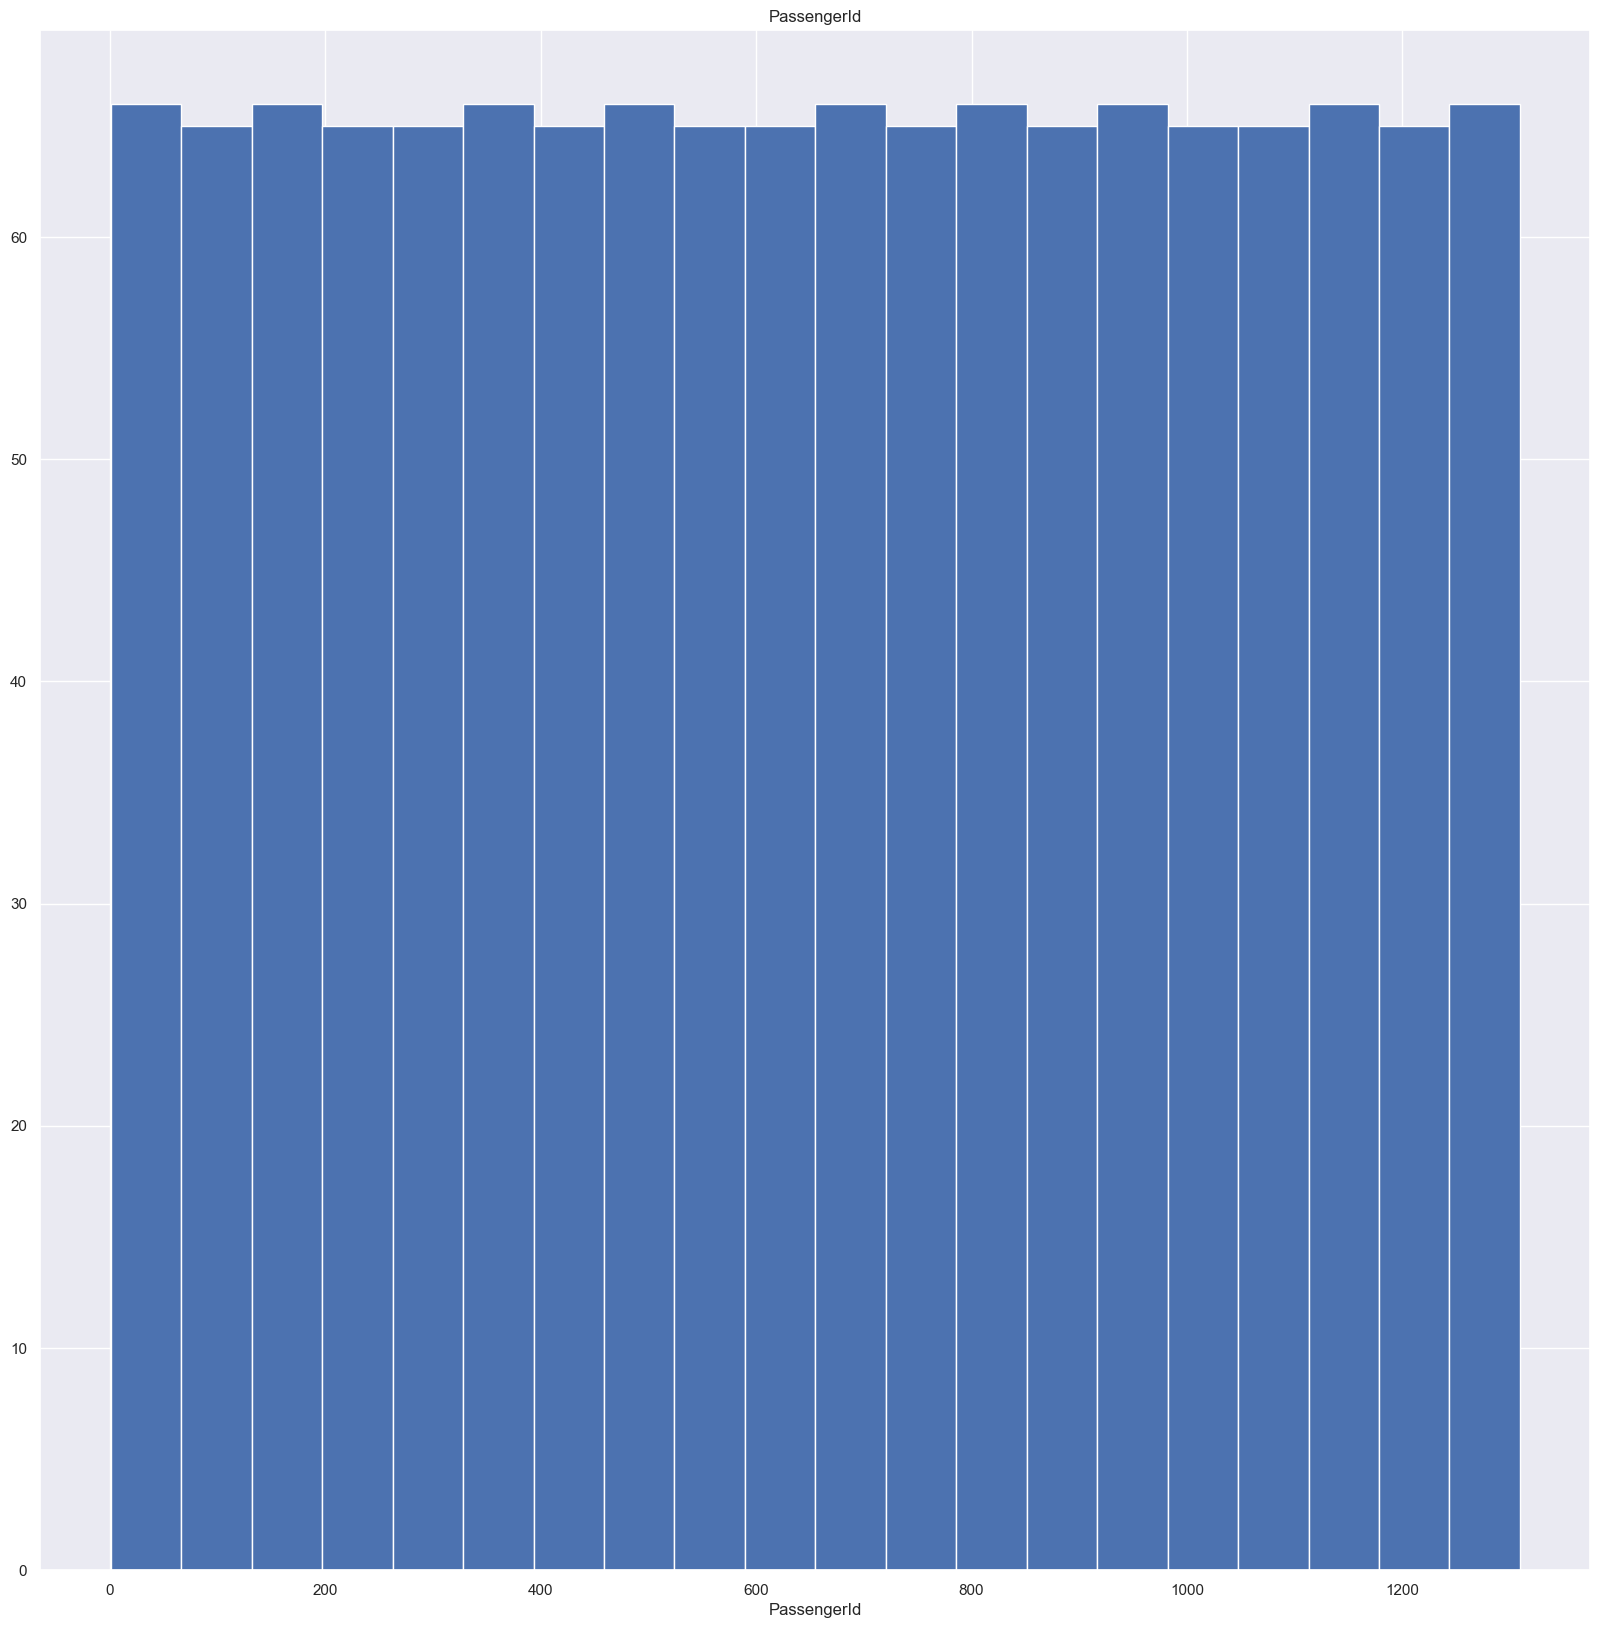


##################################################
############## PassengerId Details ###############
count    1309.000000
mean      655.000000
std       378.020061
min         1.000000
5%         66.400000
10%       131.800000
20%       262.600000
50%       655.000000
60%       785.800000
80%      1047.400000
90%      1178.200000
95%      1243.600000
99%      1295.920000
max      1309.000000
Name: PassengerId, dtype: float64

##################################################



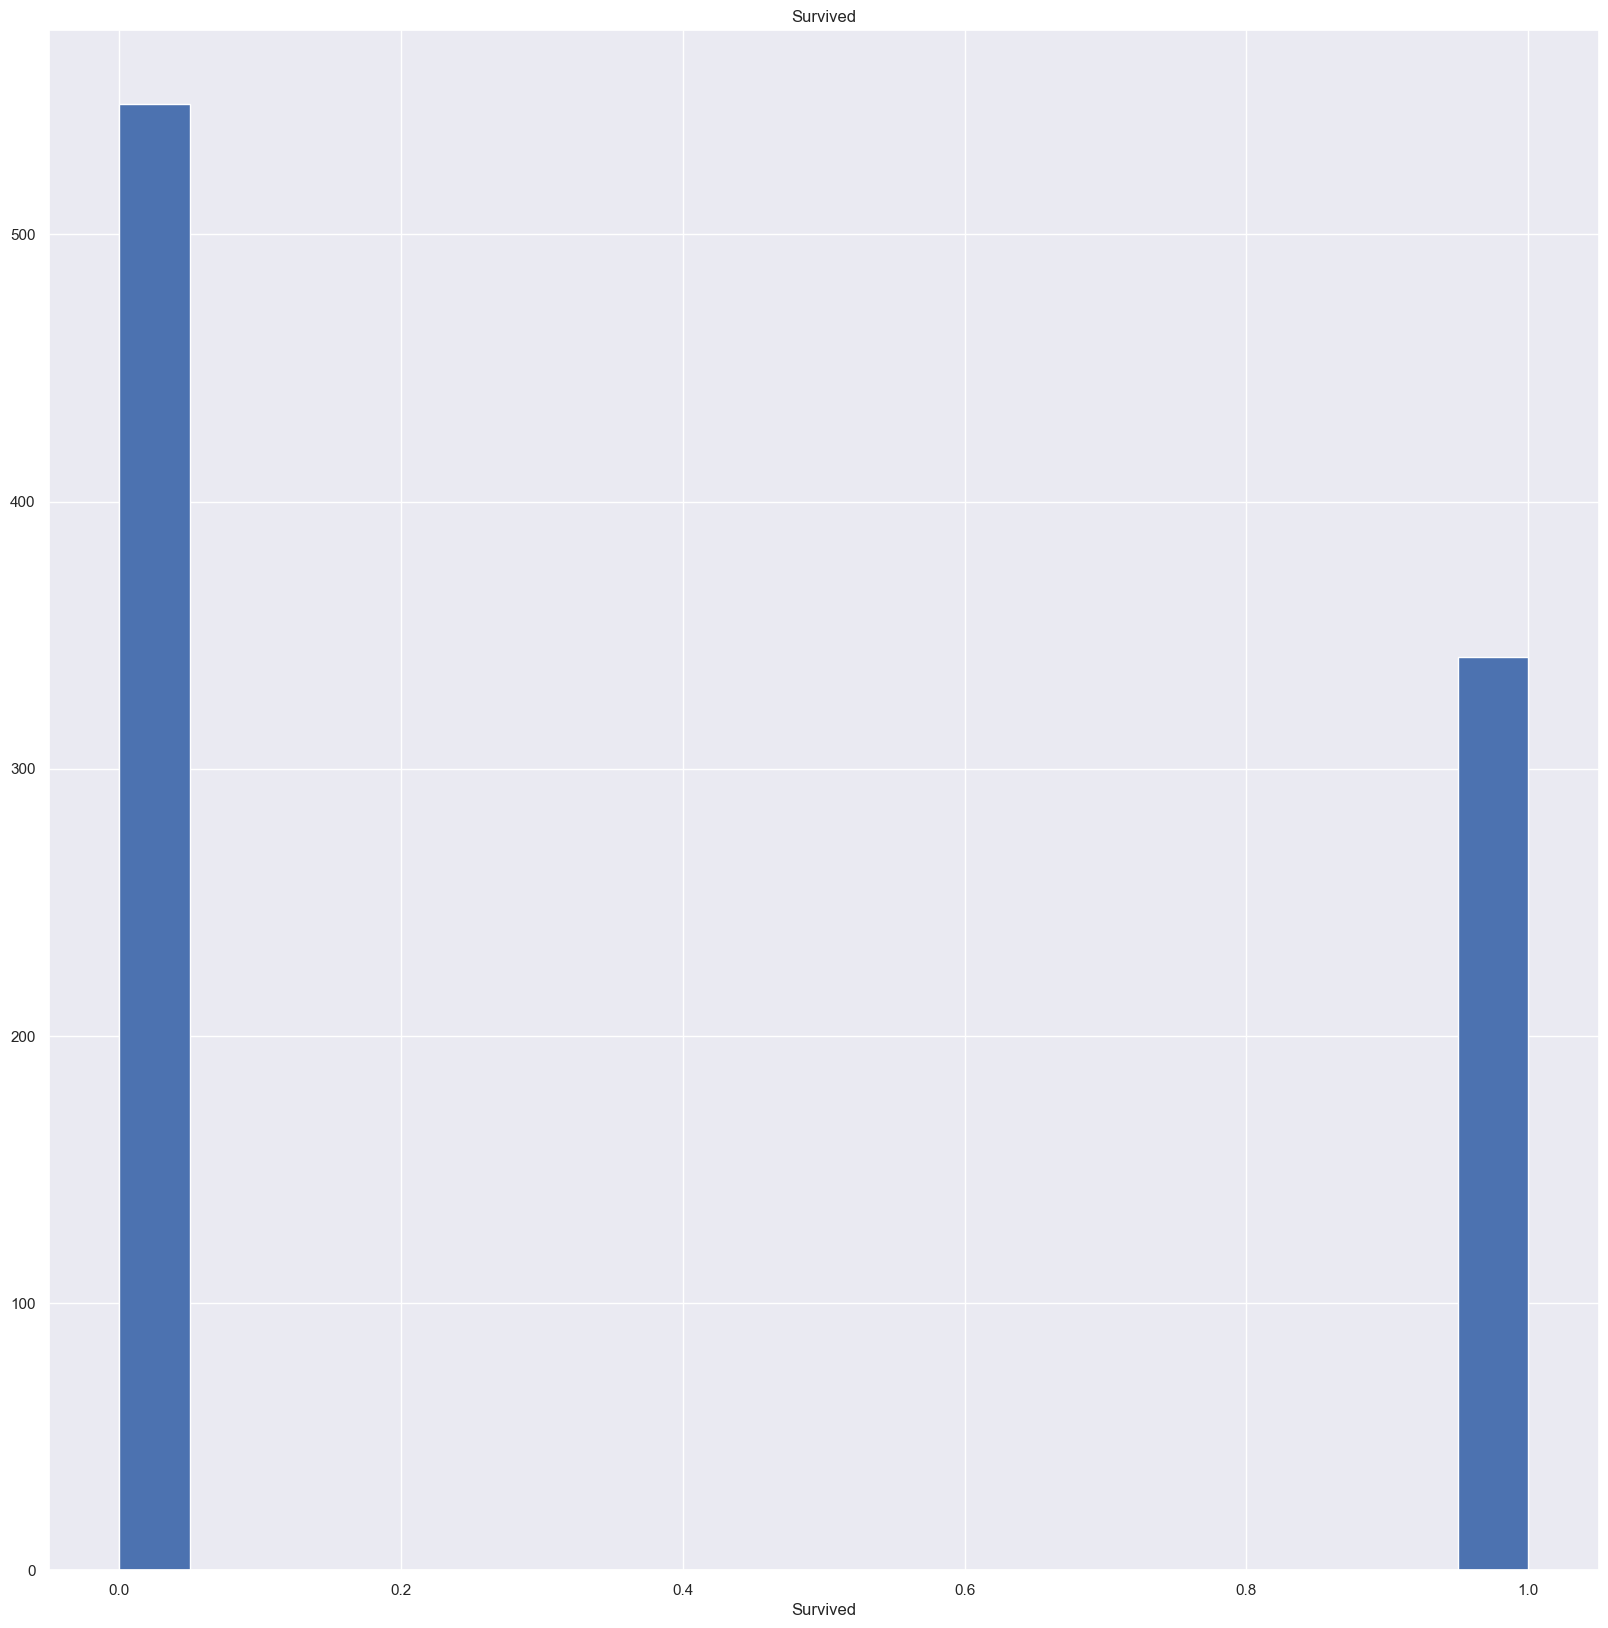


##################################################
################ Survived Details ################
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
50%        0.000000
60%        0.000000
80%        1.000000
90%        1.000000
95%        1.000000
99%        1.000000
max        1.000000
Name: Survived, dtype: float64

##################################################



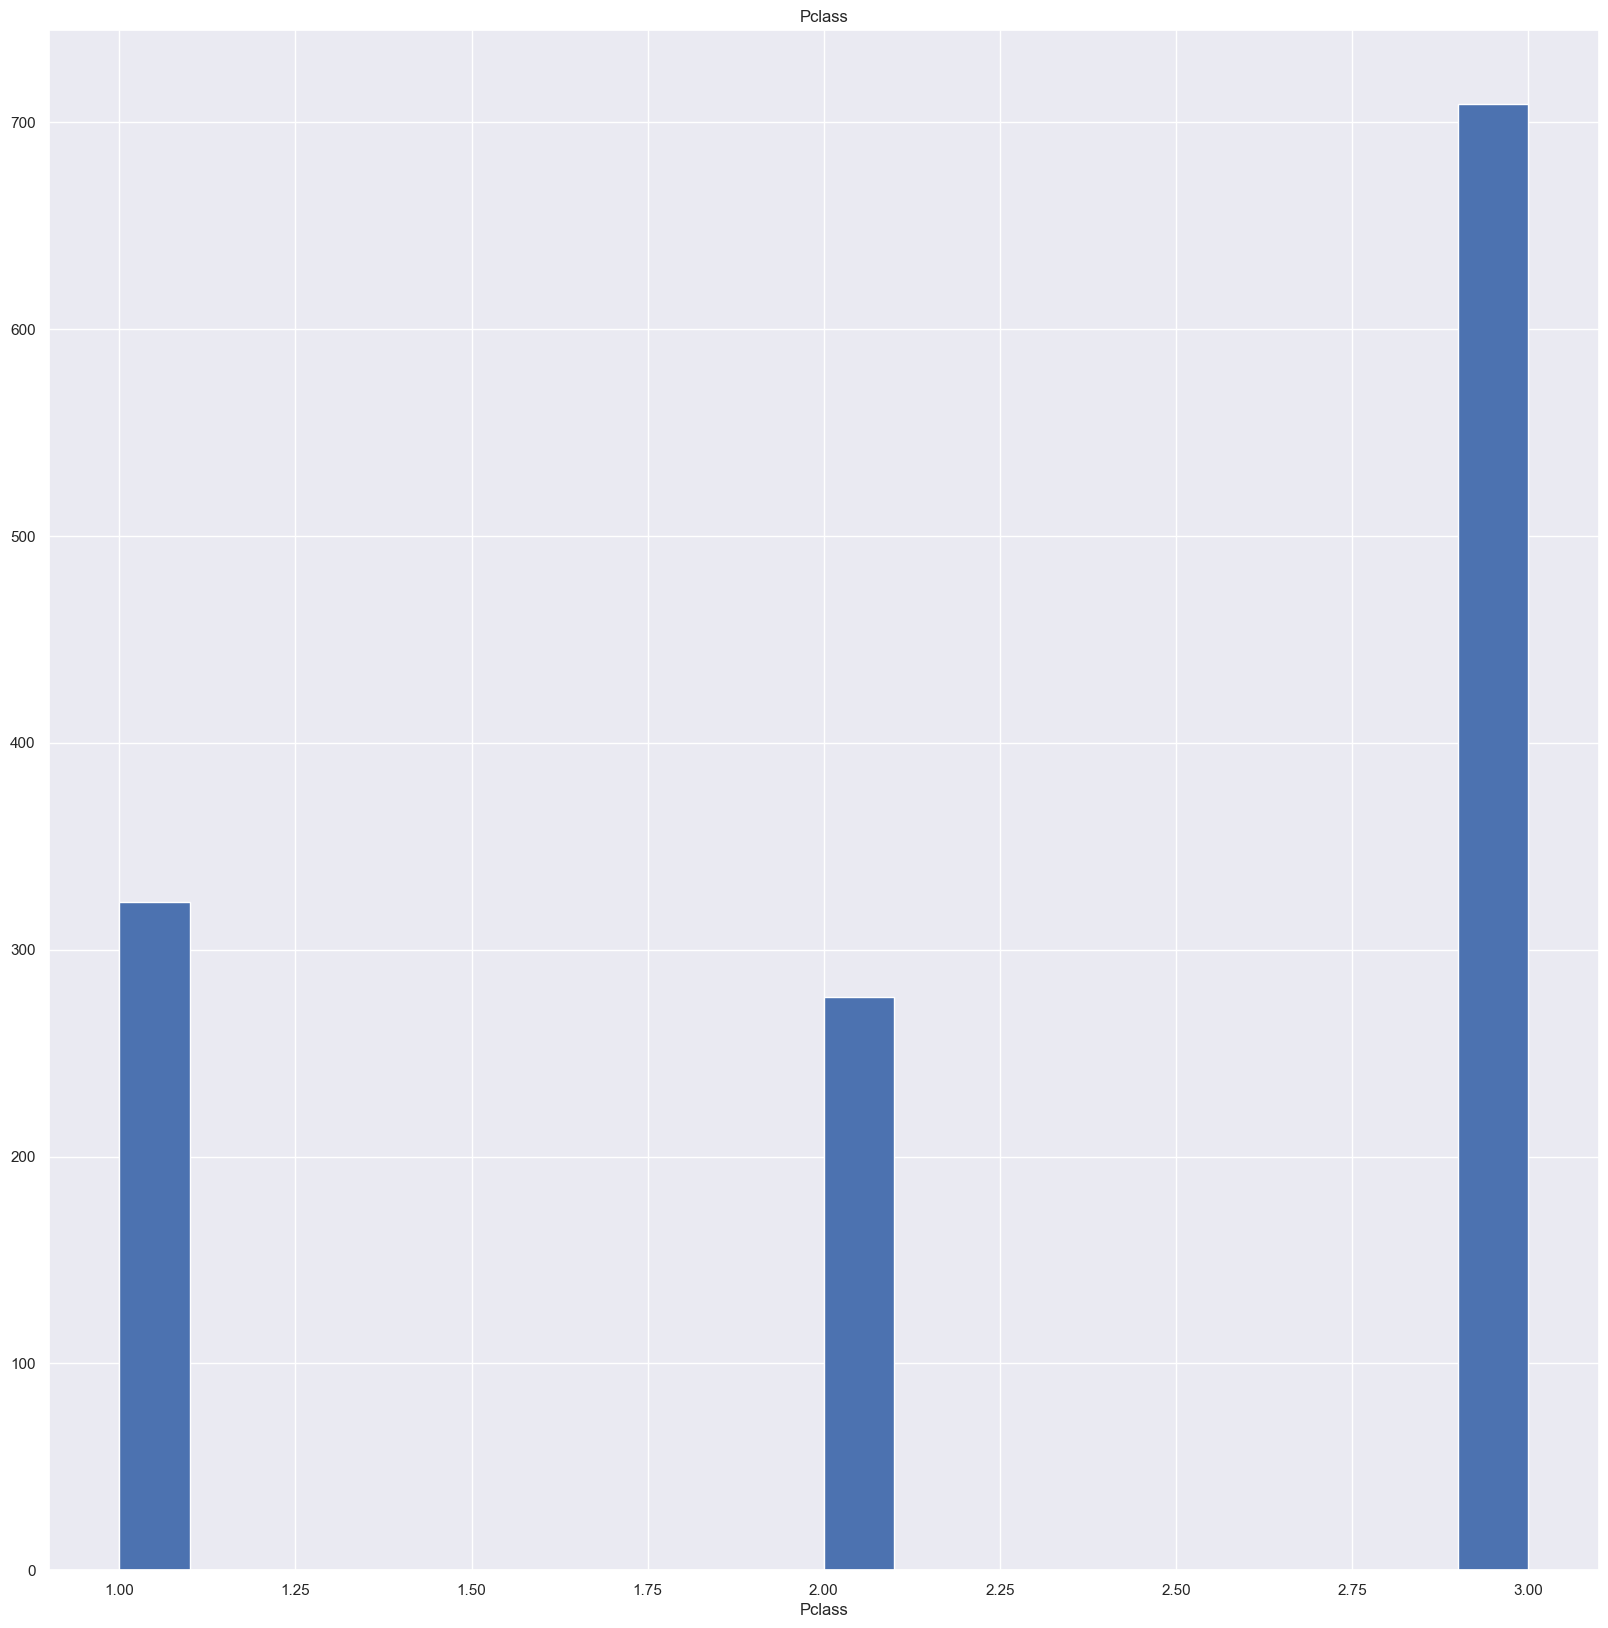


##################################################
################# Pclass Details #################
count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
50%         3.000000
60%         3.000000
80%         3.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         3.000000
Name: Pclass, dtype: float64

##################################################



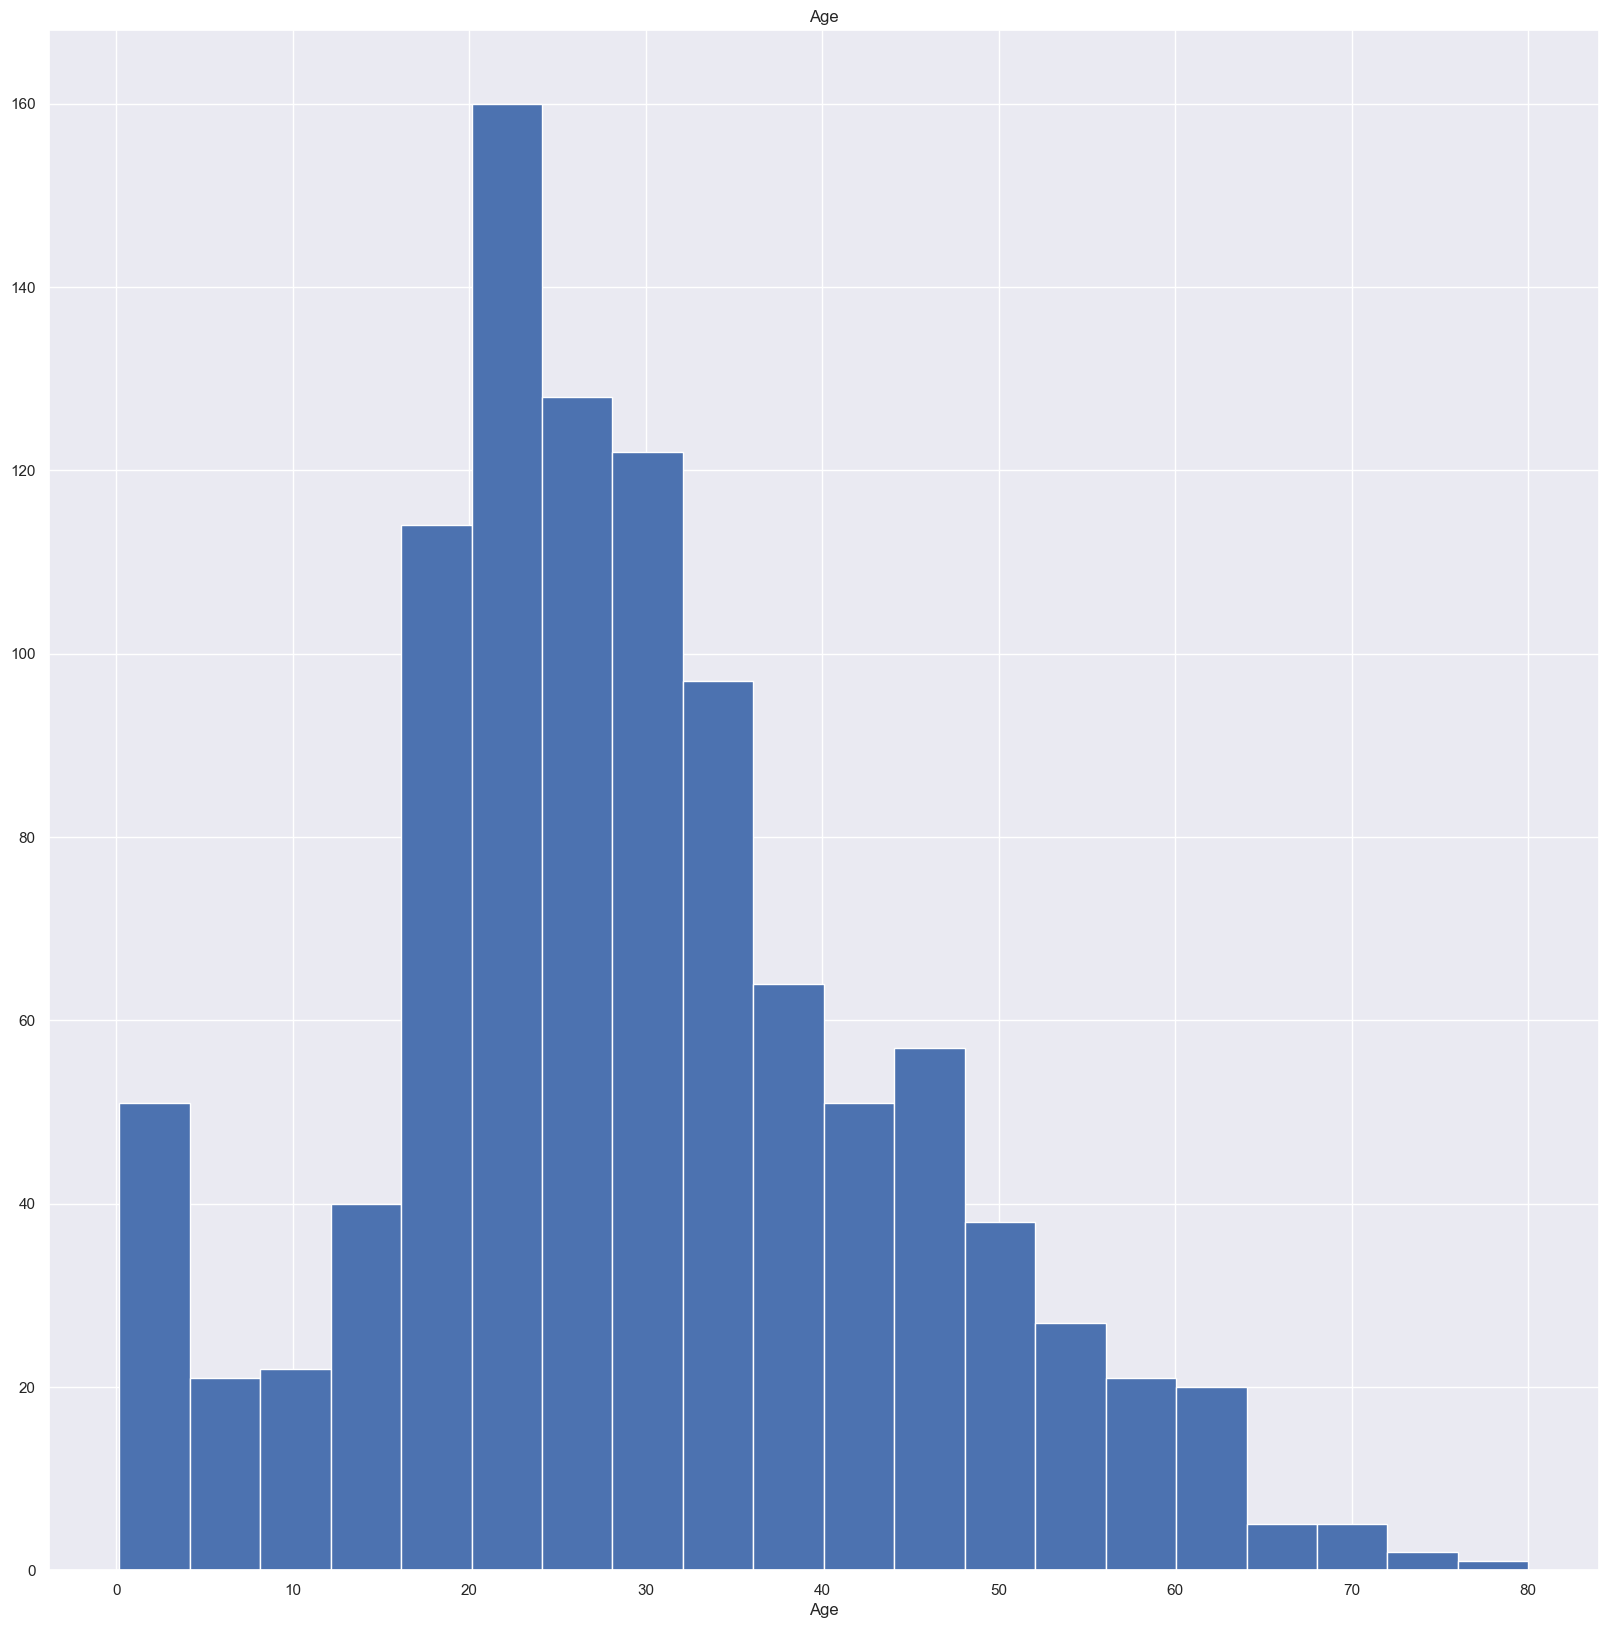


##################################################
################## Age Details ###################
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
5%          5.000000
10%        14.000000
20%        19.000000
50%        28.000000
60%        31.000000
80%        42.000000
90%        50.000000
95%        57.000000
99%        65.000000
max        80.000000
Name: Age, dtype: float64

##################################################



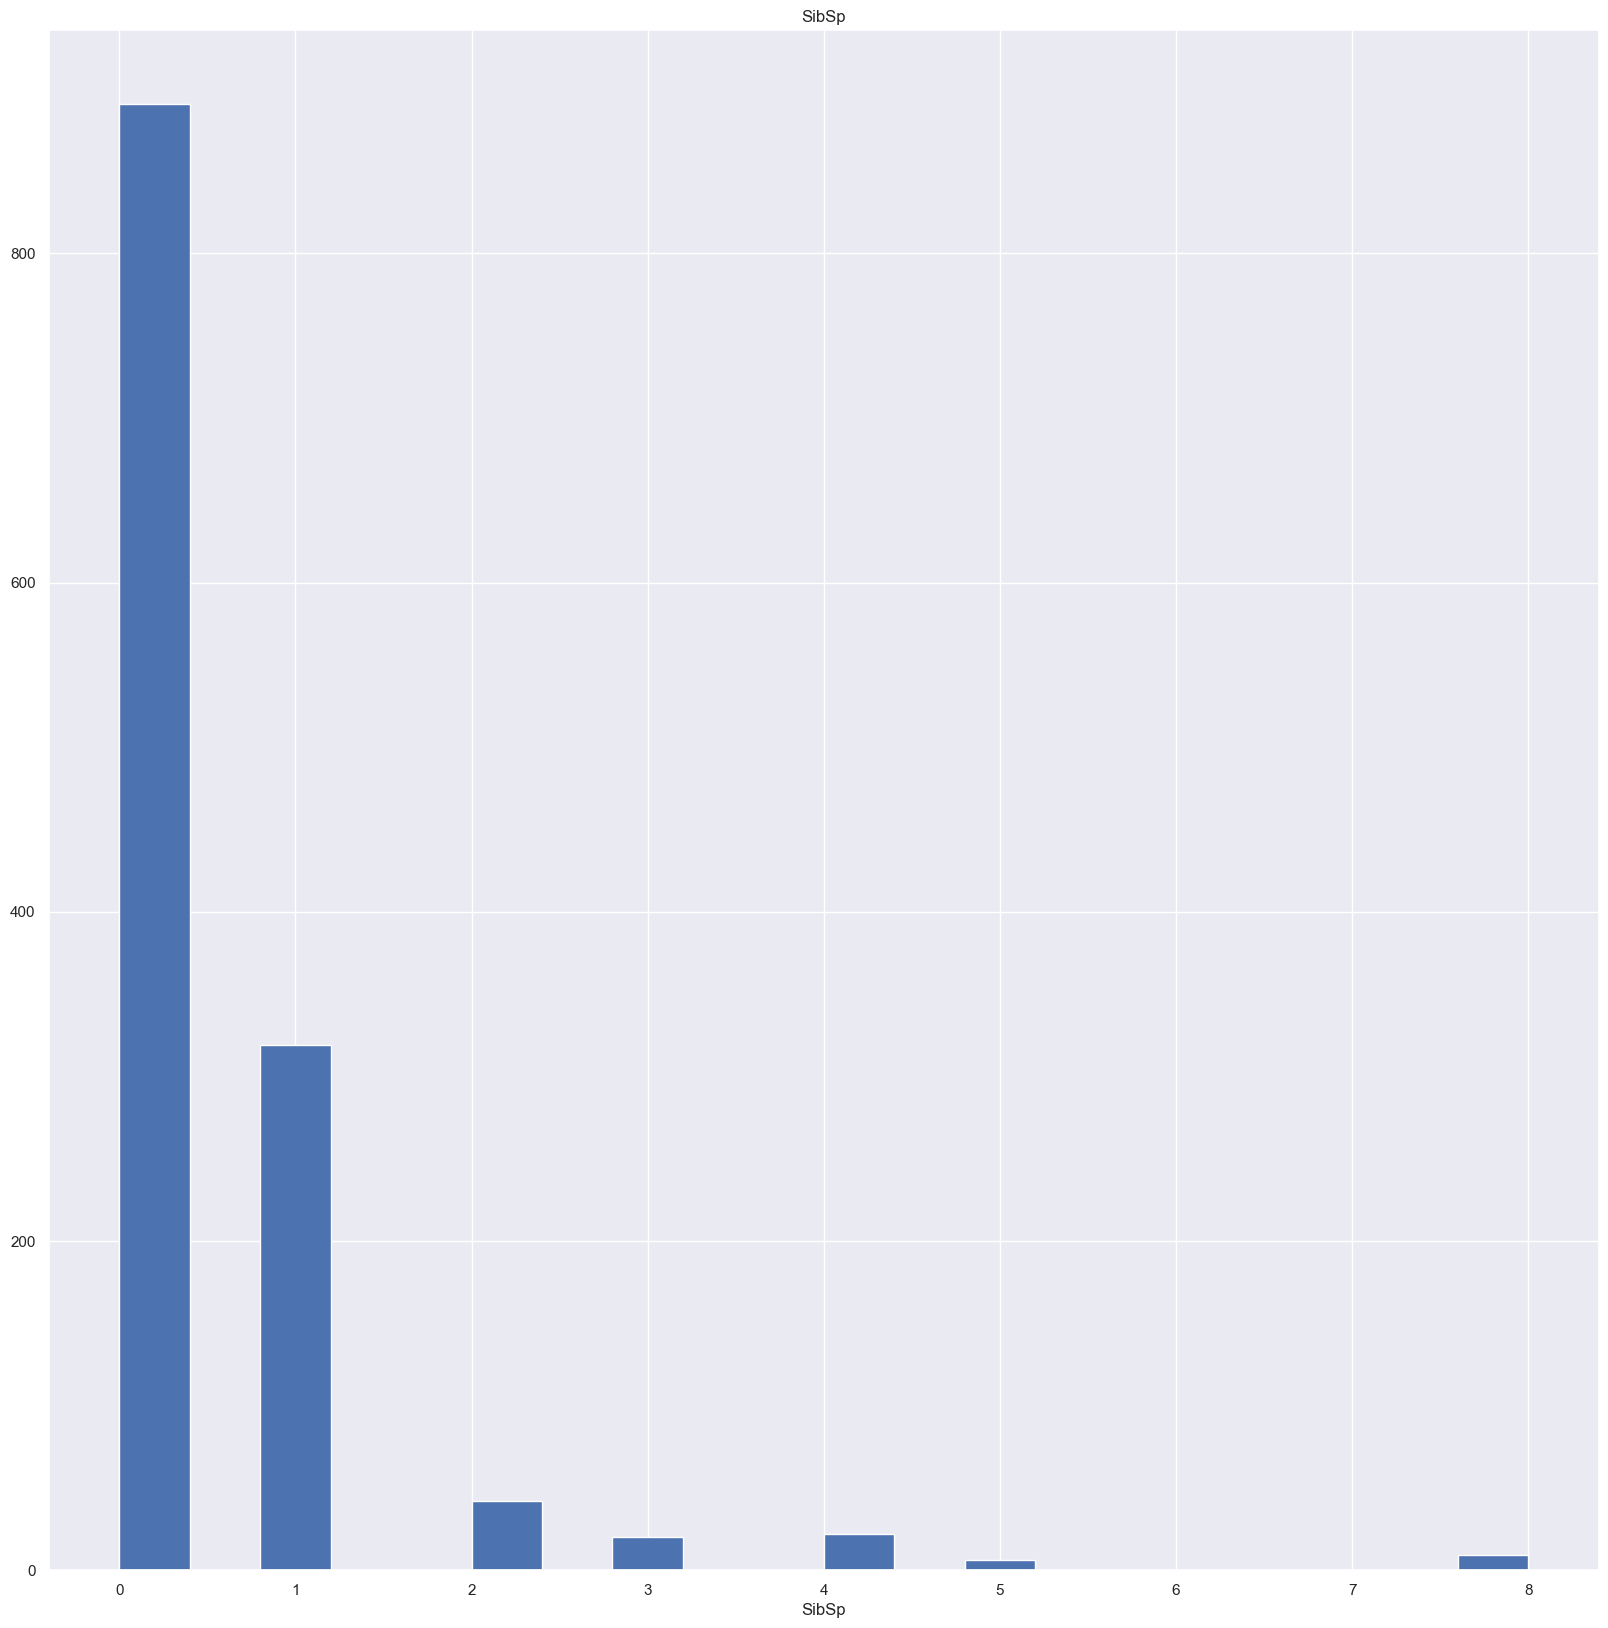


##################################################
################# SibSp Details ##################
count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         1.000000
90%         1.000000
95%         2.000000
99%         5.000000
max         8.000000
Name: SibSp, dtype: float64

##################################################



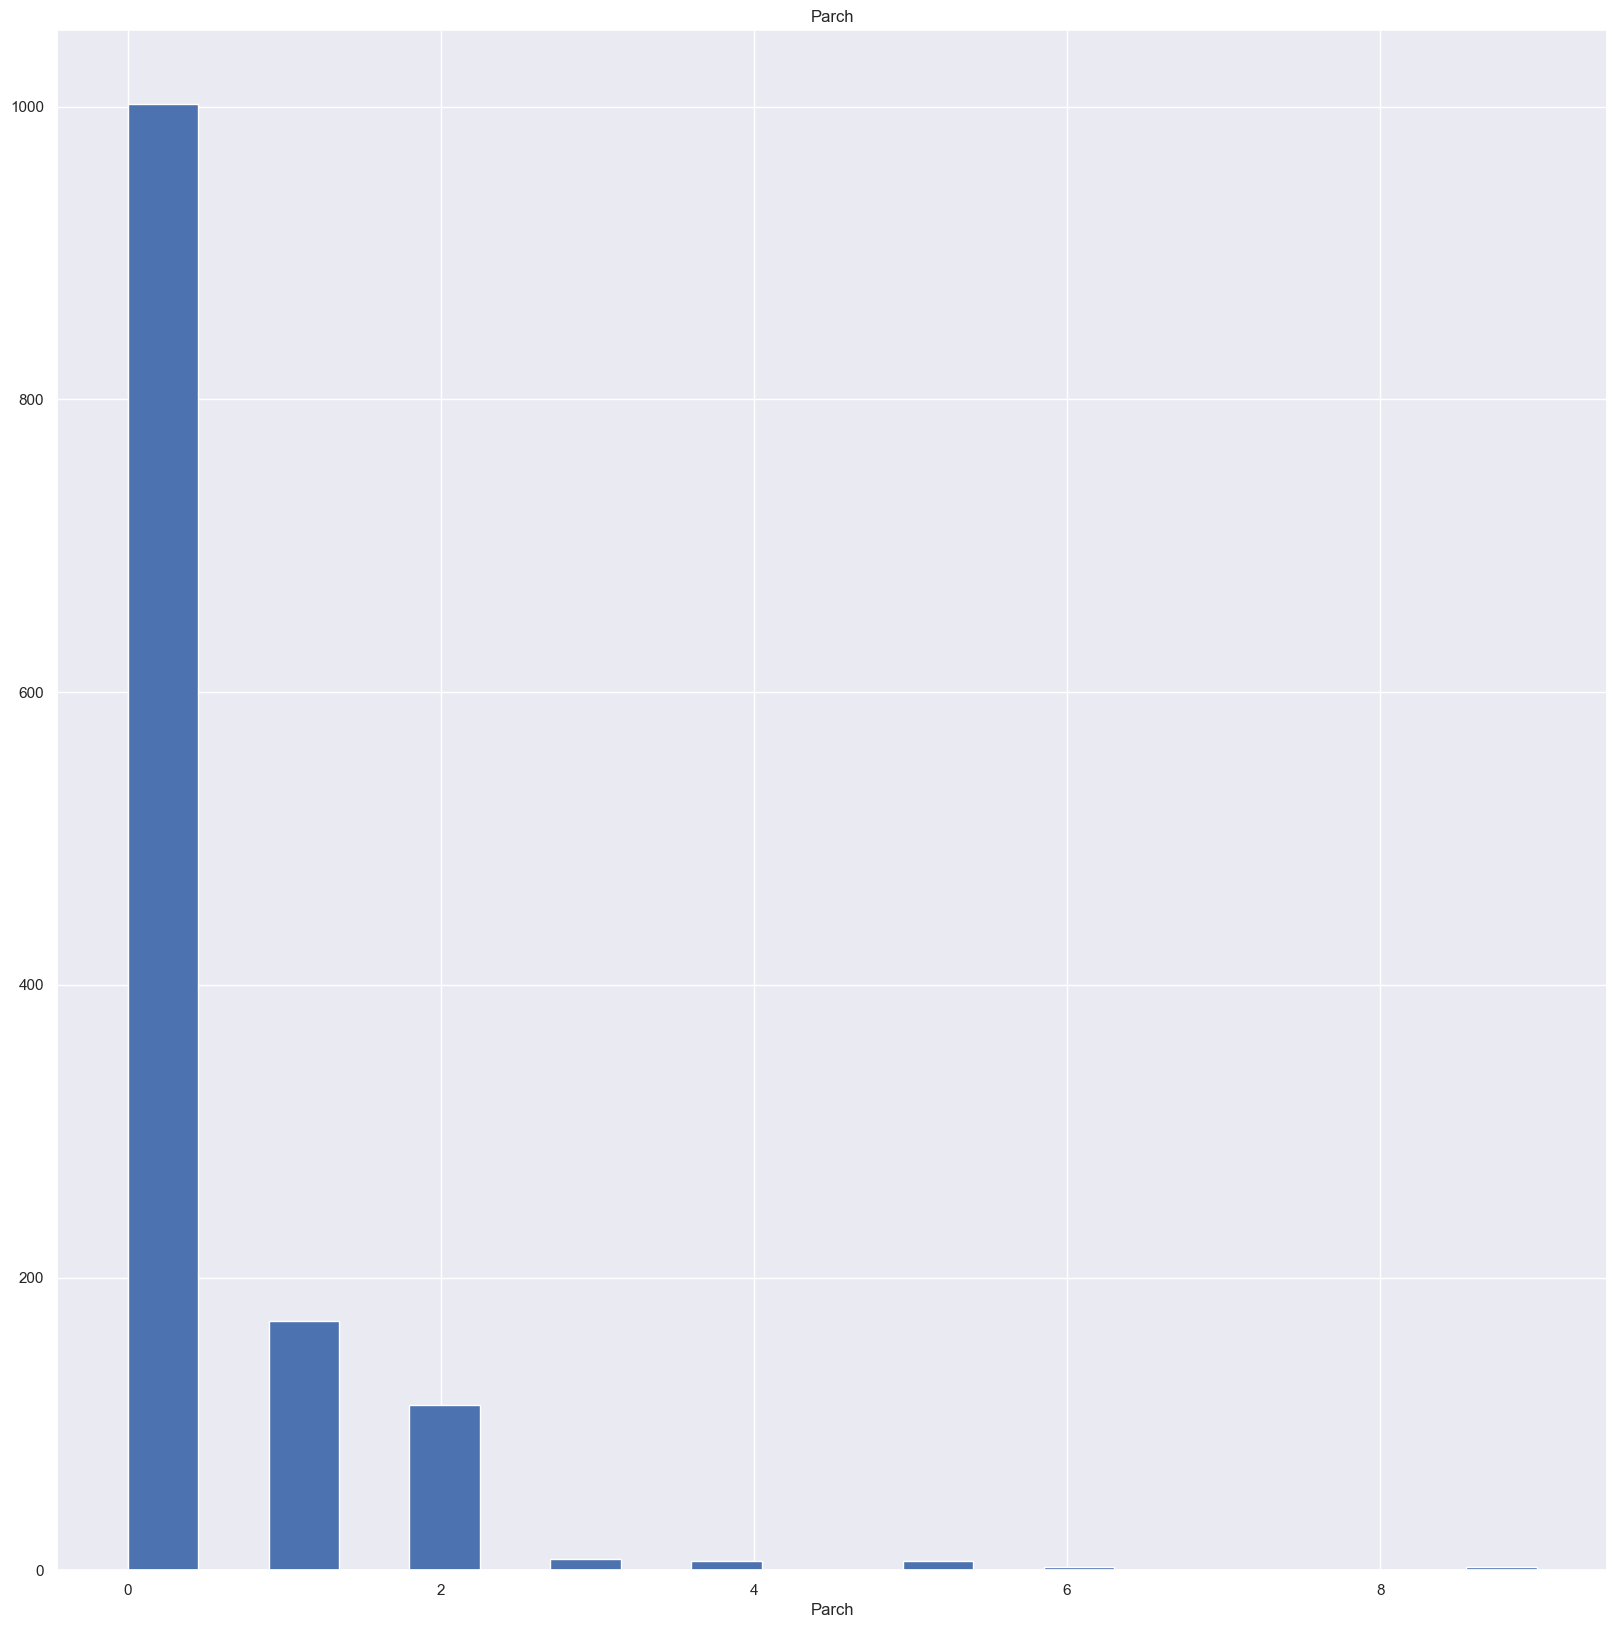


##################################################
################# Parch Details ##################
count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         1.000000
90%         2.000000
95%         2.000000
99%         4.000000
max         9.000000
Name: Parch, dtype: float64

##################################################



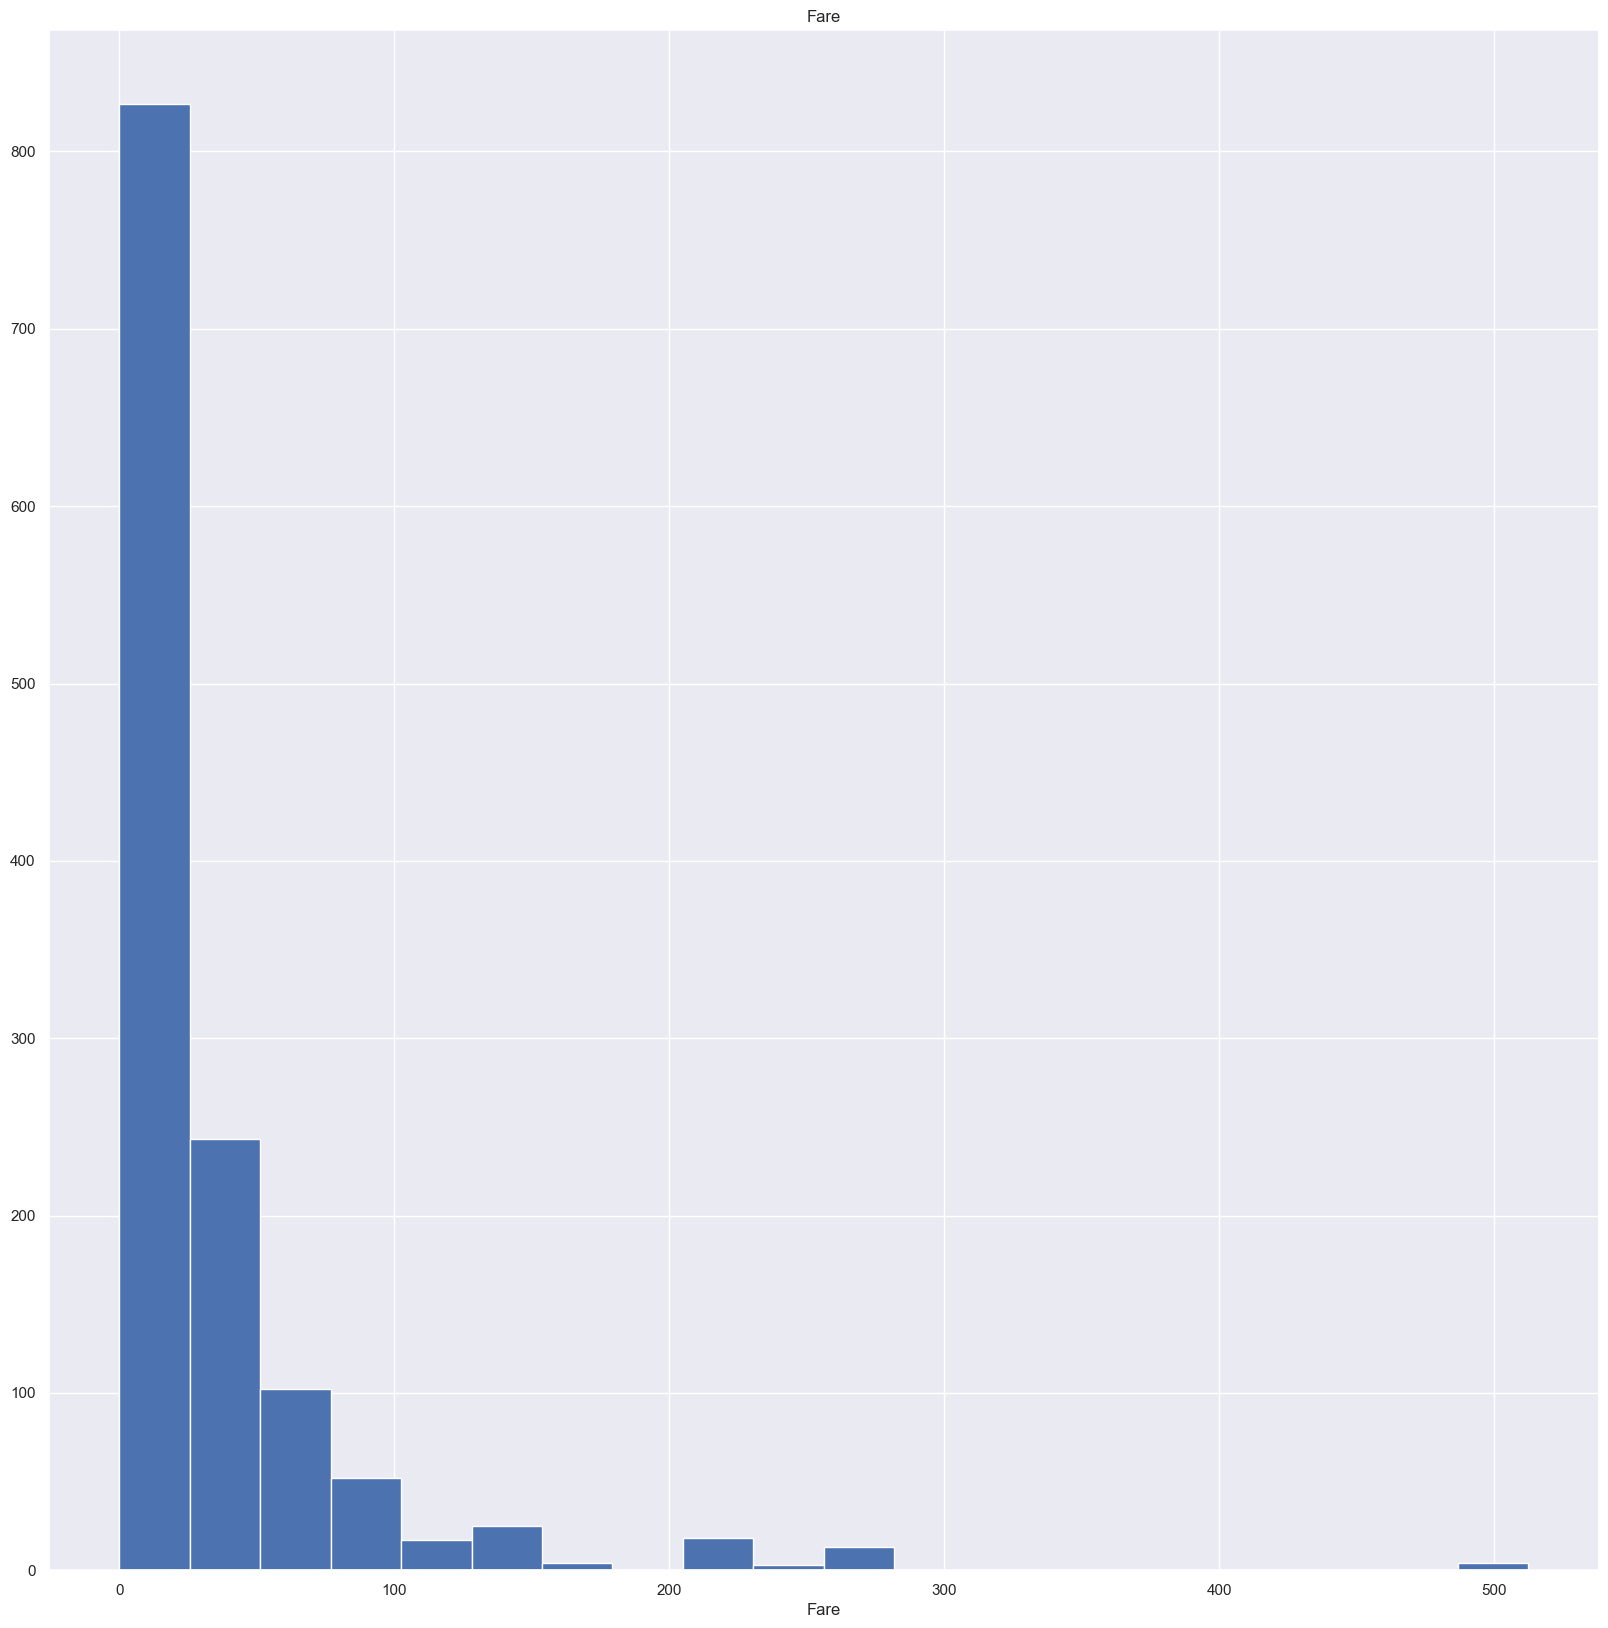


##################################################
################## Fare Details ##################
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
5%          7.225000
10%         7.567500
20%         7.854200
50%        14.454200
60%        21.679200
80%        41.579200
90%        78.050820
95%       133.650000
99%       262.375000
max       512.329200
Name: Fare, dtype: float64

##################################################



In [220]:
for col in num_cols:
    num_details(df, col, plot=True)

## 5. Target Variable

In [221]:
def target_details_with_cat(dataframe, target, categorical_col):
    for col in categorical_col:
        print(f"{'#' * 10} {col} Details {'#' * 10}".center(50, '#'))
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [222]:
target_details_with_cat(df, "Survived", cat_cols)

################## Sex Details ###################
        Survived_Mean
Sex                  
female       0.742038
male         0.188908


################ Embarked Details ################
          Survived_Mean
Embarked               
C              0.553571
Q              0.389610
S              0.336957




In [223]:
def plot_continuous_target(df, target, numeric_cols):
    for col in numeric_cols:
        print(f"{'#' * 10} {col} Details {'#' * 10}".center(50, '#'))
        plt.figure(figsize=(10, 5))
        sns.regplot(x=df[col], y=df[target], line_kws={"color": "red"})
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

############## PassengerId Details ###############


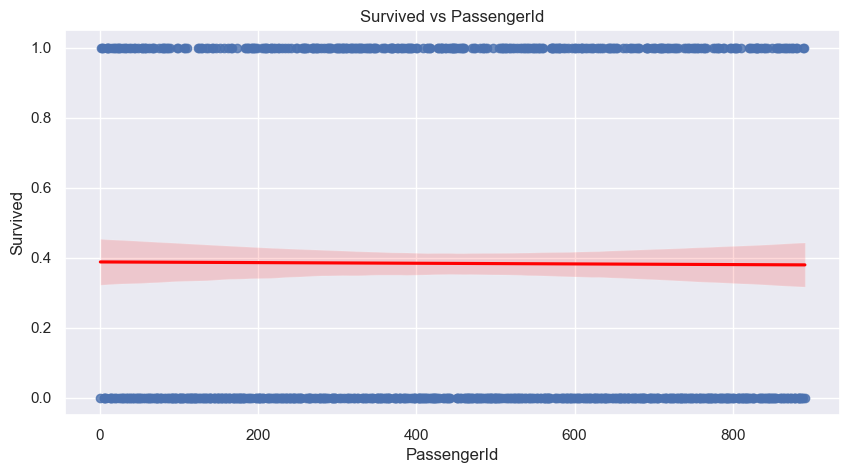

################ Survived Details ################


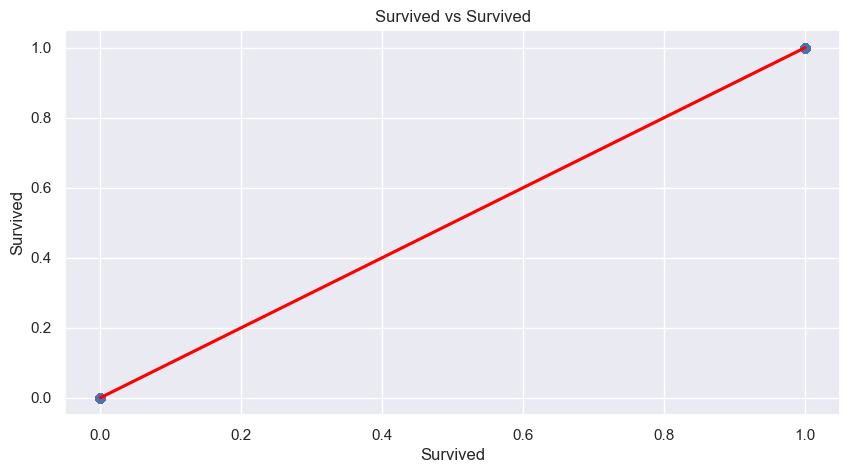

################# Pclass Details #################


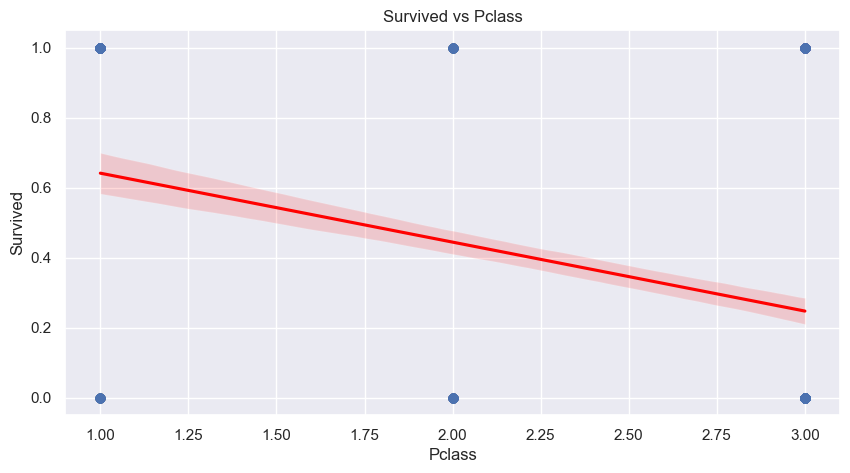

################## Age Details ###################


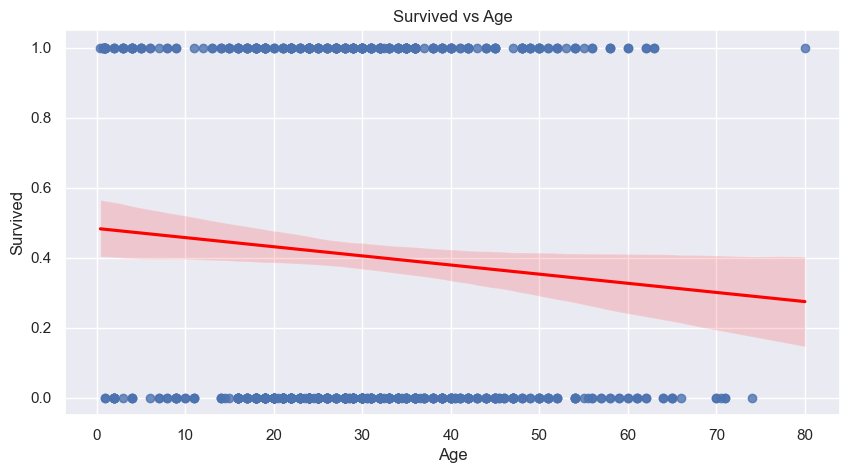

################# SibSp Details ##################


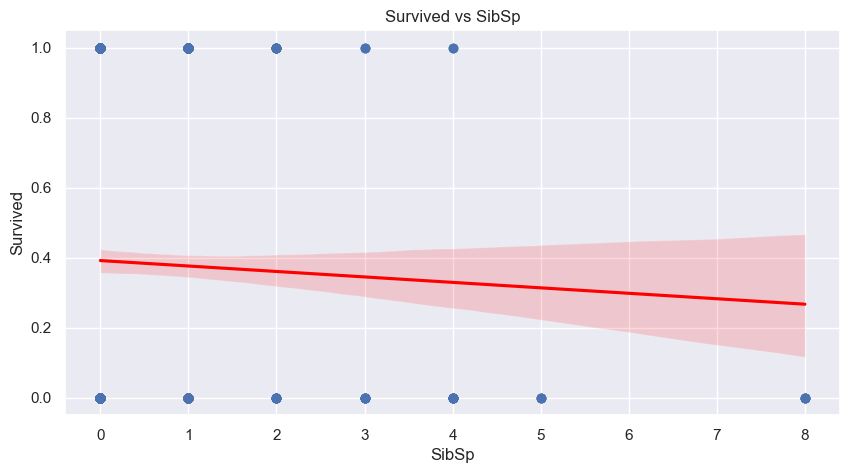

################# Parch Details ##################


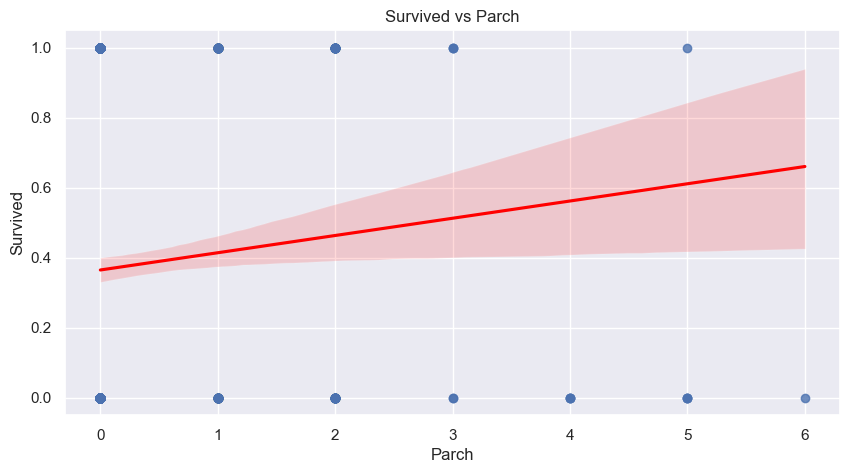

################## Fare Details ##################


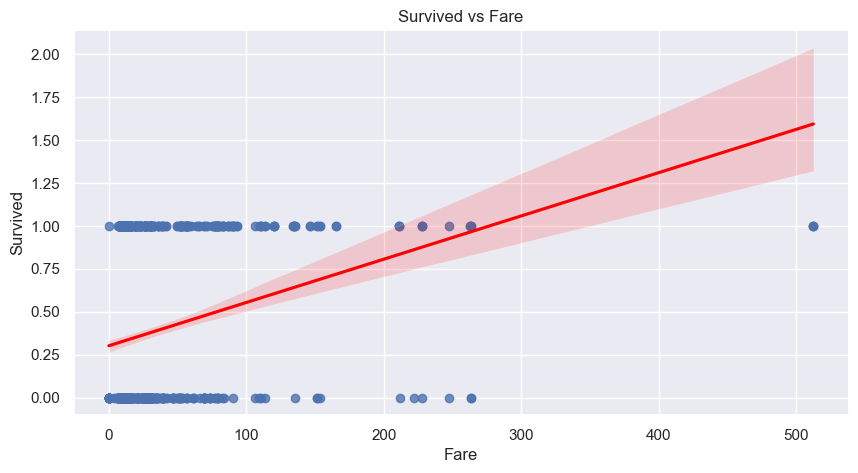

In [224]:
plot_continuous_target(df, "Survived", num_cols)

## 6. Outliers

################## PassengerId Details ##################


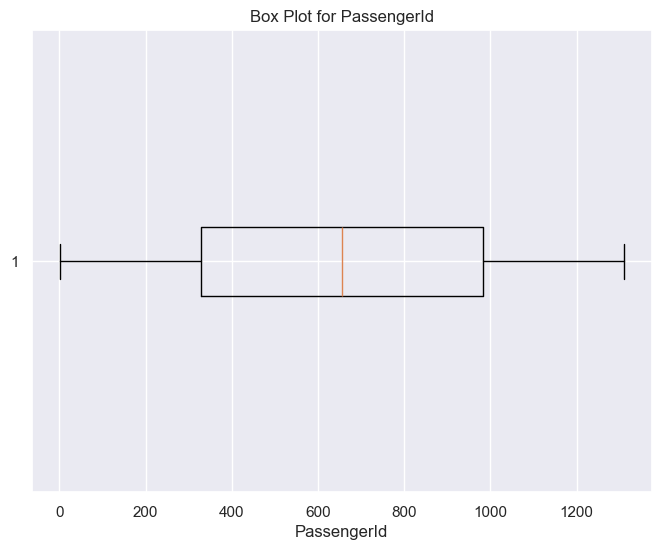

#################### Survived Details ###################


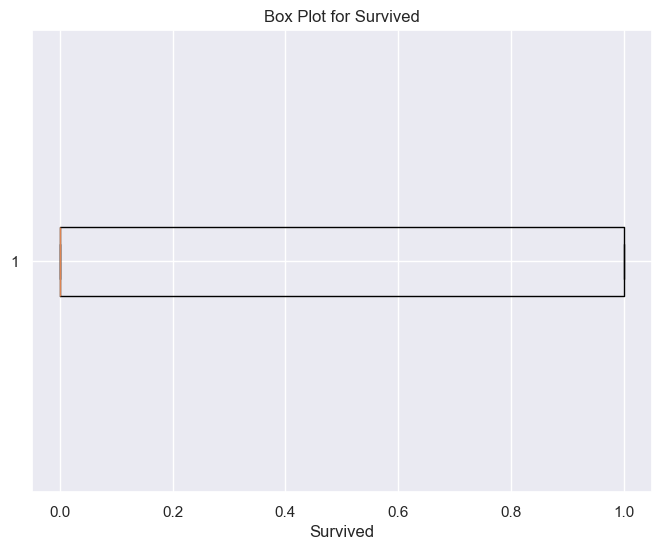

##################### Pclass Details ####################


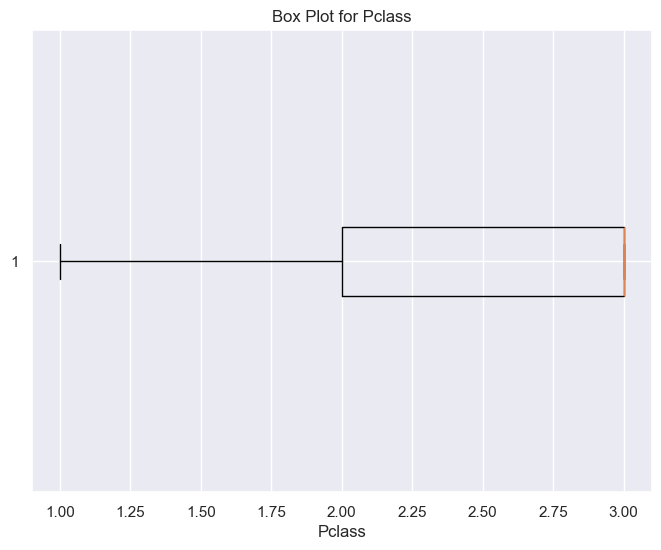

###################### Age Details ######################


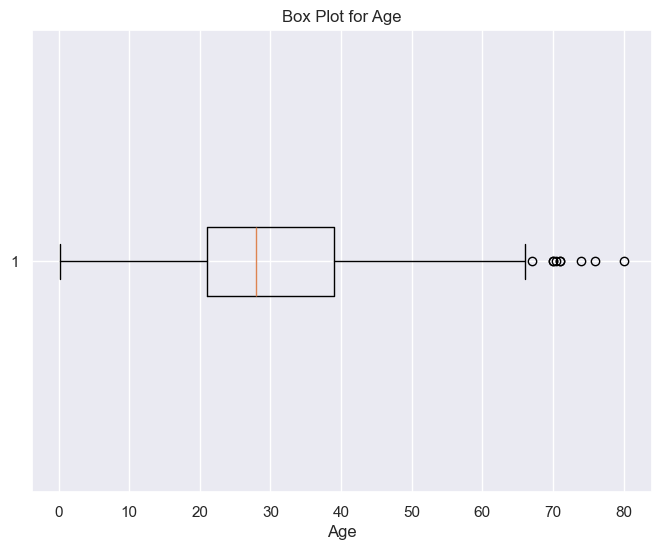

##################### SibSp Details #####################


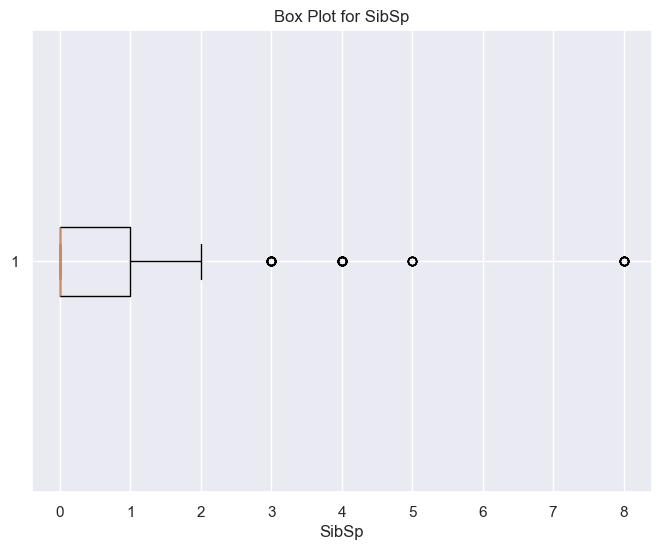

##################### Parch Details #####################


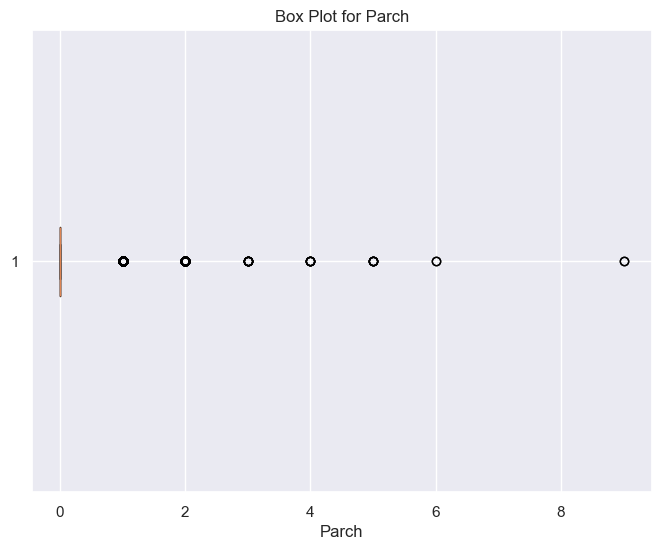

###################### Fare Details #####################


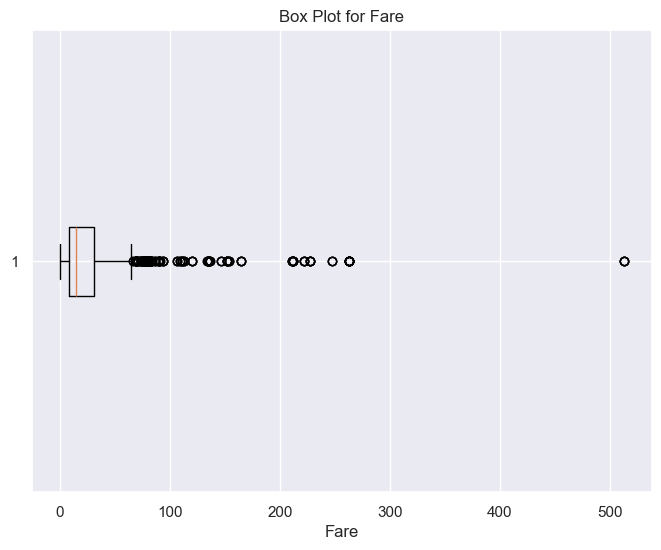

In [225]:
for col in num_cols:
    print(f"{'#' * 10} {col} Details {'#' * 10}".center(57, '#'))
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False) 
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

In [226]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    # Calculate quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Calculate interquartile range
    interquantile_range = quartile3 - quartile1
    
    # Calculate outlier thresholds
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [227]:
def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [228]:
check_outlier(df, num_cols)

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 1309, dtype: bool

In [229]:
def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    
    return results

In [230]:
check_all_columns_outliers(df, num_cols)

{'PassengerId': np.False_,
 'Survived': np.False_,
 'Pclass': np.False_,
 'Age': np.False_,
 'SibSp': np.False_,
 'Parch': np.False_,
 'Fare': np.False_}

In [231]:
def show_column_names_with_outliers_info(dataframe, col_list):
    print(f"{'#' * 10} Numeric Columns Outlier Thresholds: Low & Up Limit {'#' * 10}".center(100, '#'))
    for col in col_list:
        low, up = outlier_thresholds(dataframe, col)
        print(f"{col} : low: {low}, up: {up}", end="\n")
    print(end="\n\n")

    # Categorize columns based on outlier presence
    no_outliers = []
    have_outliers = []
    for col, has_outliers in check_all_columns_outliers(dataframe, col_list).items():
        if has_outliers:
            have_outliers.append(col)
        else:
            no_outliers.append(col)

    # Print columns with outliers
    print(f"{'#' * 10} Numeric Columns Have Outliers {'#' * 10}".center(100, '#'))
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")

    # Print columns without outliers
    print(f"{'#' * 10} Numeric Columns Have NOT Outliers {'#' * 10}".center(100, '#'))
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")

    return have_outliers, no_outliers

In [232]:
have_outliers, no_outliers = show_column_names_with_outliers_info(df, num_cols)

######################## Numeric Columns Outlier Thresholds: Low & Up Limit ########################
PassengerId : low: -1908.6800000000003, up: 3218.6800000000003
Survived : low: -1.5, up: 2.5
Pclass : low: -2.0, up: 6.0
Age : low: -95.2, up: 161.12
SibSp : low: -7.5, up: 12.5
Parch : low: -6.0, up: 10.0
Fare : low: -393.5625, up: 655.9375


################################## Numeric Columns Have Outliers ###################################
[]
count_columns: 0

################################ Numeric Columns Have NOT Outliers #################################
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
count_columns: 7



## 7. Correlation

In [233]:
corr = df[num_cols].corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


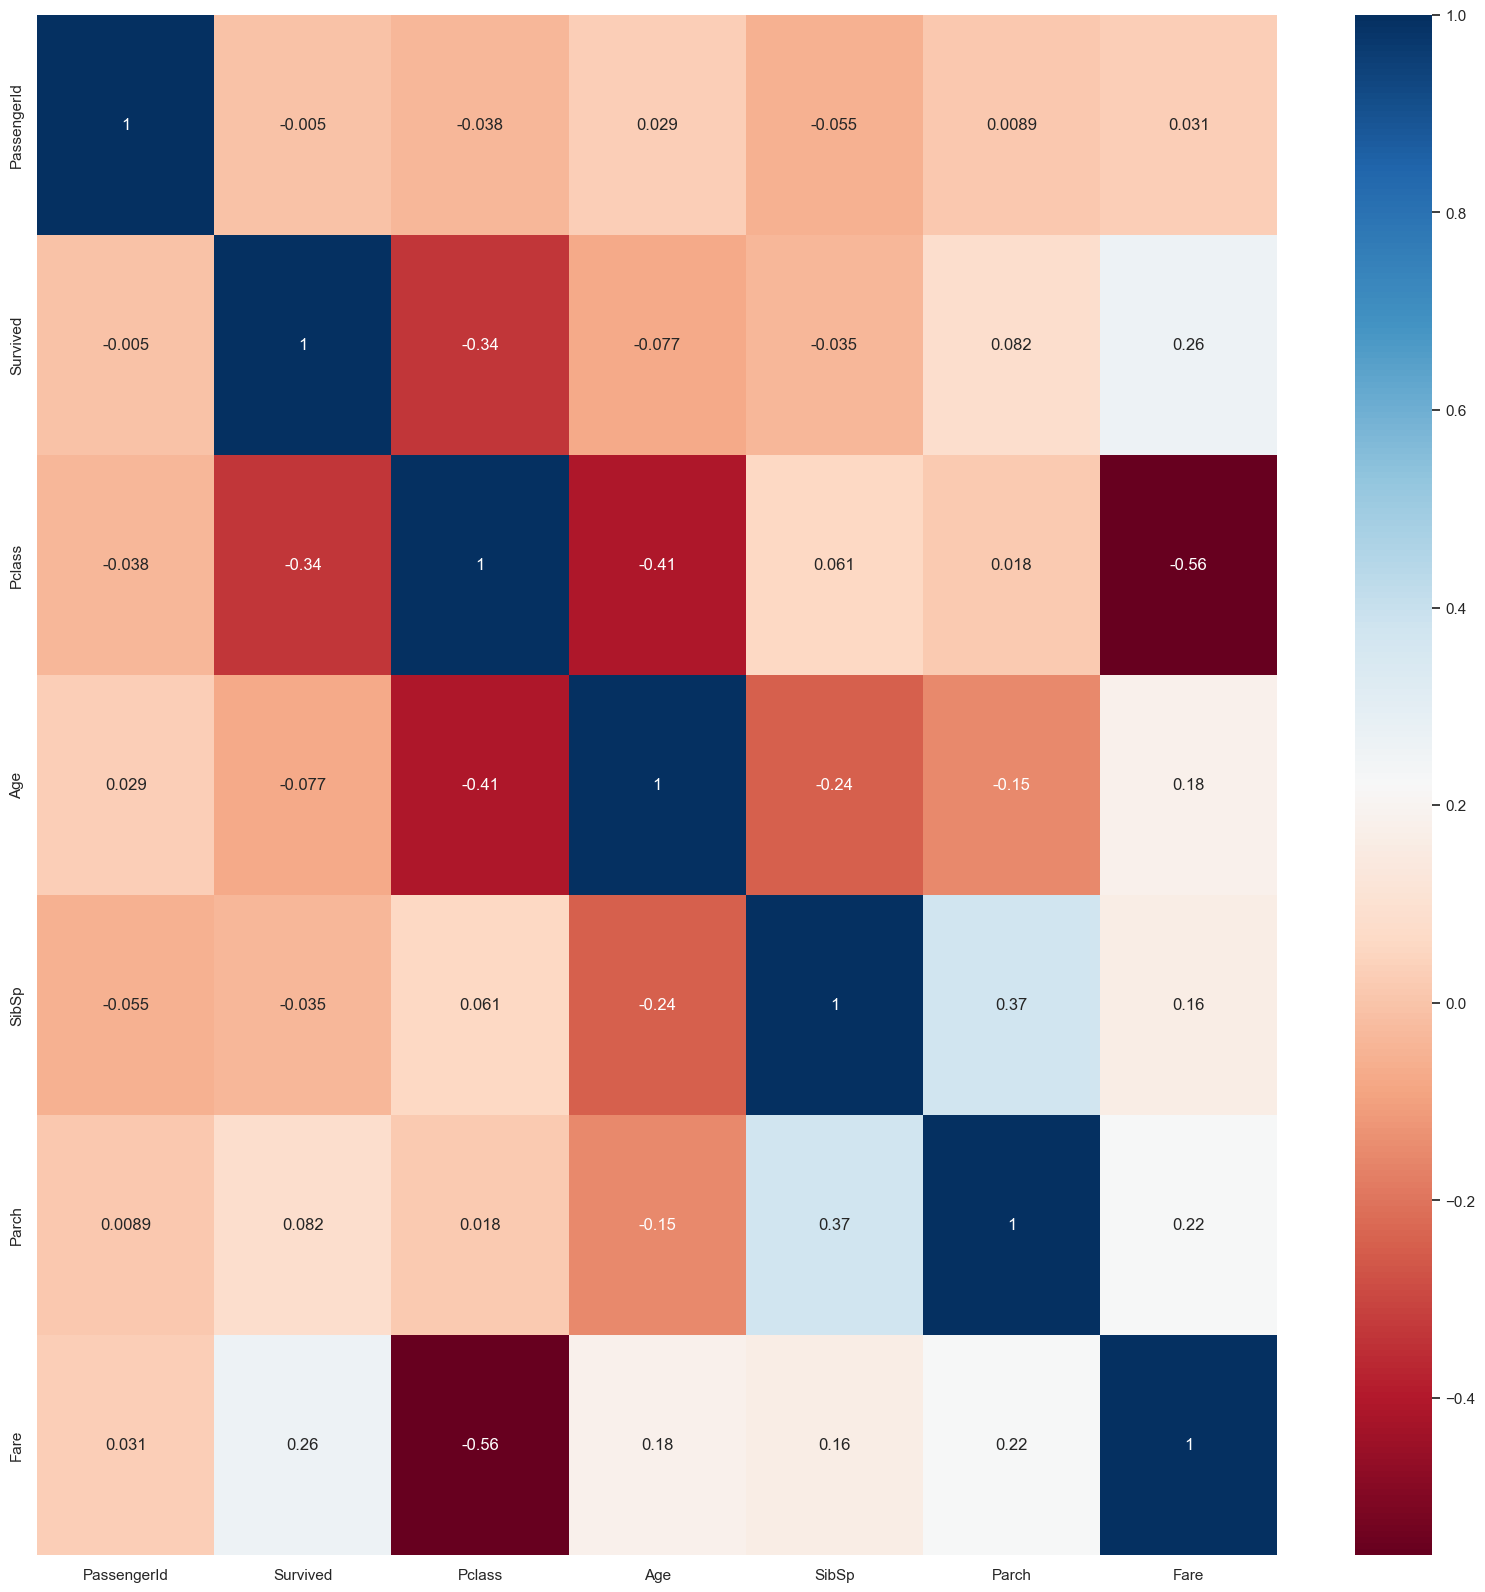

In [234]:
sns.set(rc = {"figure.figsize":(20, 20)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

In [235]:
def high_correlated_cols(dataframe, plot= False, corr_th = 0.90):
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        sns.set(rc = {"figure.figsize":(20, 20)})
        sns.heatmap(corr_matrix, cmap="RdBu", annot=True)
        plt.show()
        
    return drop_list

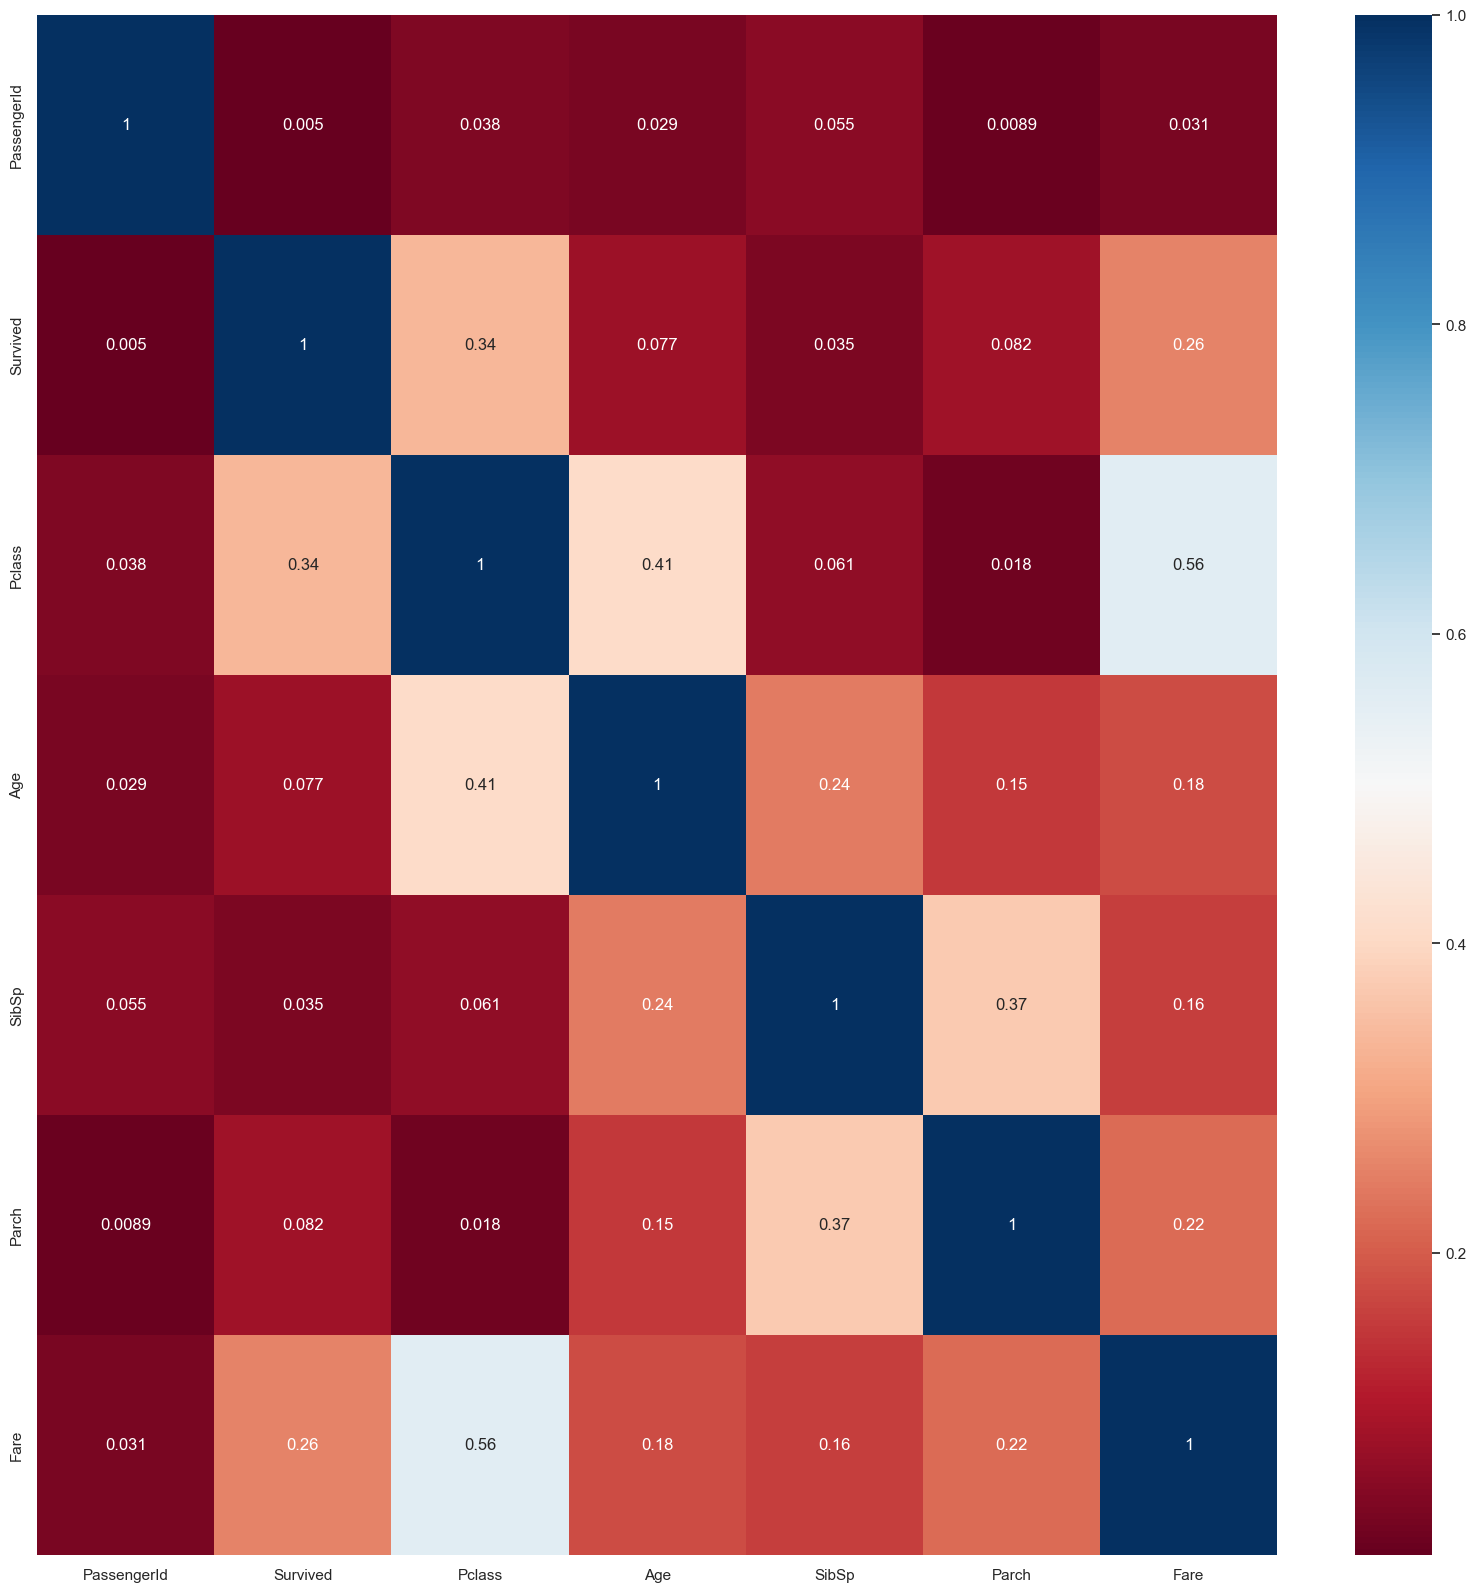

[]

In [236]:
high_correlated_cols(df[num_cols], plot=True)

## 8. Missing Values

In [237]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [238]:
missing_values_table(df)

          n_miss  ratio
Survived     418  31.93
Age          263  20.09
Embarked       2   0.15
Fare           1   0.08


In [240]:
missing_cols = ['Age', 'Embarked', 'Fare']

In [249]:
# Filling numerical missing values: Age, Fare

def quick_missing_imp(data, num_method="median", cat_length=20, target="Survived"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    
    print("# Before")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
    
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    
    data[target] = temp_target
    print("# After \nImputation method is 'MODE' for categorical variables!")
    print("Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    return data

In [247]:
df = quick_missing_imp(df, num_method="mean", cat_length=17)

# Before
Survived    418
Age         263
Fare          1
Embarked      2
dtype: int64 


# After 
Imputation method is 'MODE' for categorical variables!
Imputation method is 'MEAN' for numeric variables! 

Survived    418
Age           0
Fare          0
Embarked      0
dtype: int64 




## 9. Outlier Suppression

In [250]:
def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

In [252]:
df[have_outliers].dtypes

Series([], dtype: object)

In [253]:
for col in have_outliers:
    if col not in ["Survived"]:
        replace_with_thresholds(df, col)

## 10. Encoding for Base Model

In [254]:
df_base = df.copy()

In [255]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(), "Ratio": dataframe[col].value_counts() / len(dataframe), "Target_mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [256]:
rare_analyser(df, "Survived", cat_cols)

Sex : 2
        Count     Ratio  Target_mean
Sex                                 
female    466  0.355997     0.742038
male      843  0.644003     0.188908


Embarked : 3
          Count     Ratio  Target_mean
Embarked                              
C           270  0.206264     0.553571
Q           123  0.093965     0.389610
S           916  0.699771     0.339009




In [257]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    
    return temp_df

In [258]:
rare_encoder(df_base, 0.01)
df_base

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,29.881138,0,0,8.0500,S
414,1306,NaN,1,female,39.000000,0,0,108.9000,C
415,1307,NaN,3,male,38.500000,0,0,7.2500,S
416,1308,NaN,3,male,29.881138,0,0,8.0500,S


In [259]:
def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [260]:
binary_cols = [col for col in df_base.columns if (df_base[col].dtypes not in ["float64", "int64", "int32"]) & (df_base[col].nunique() == 2)]
binary_cols

['Sex']

In [263]:
for col in binary_cols:
    label_encoder(df_base, col)

In [264]:
def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=drop_first)
    return dataframe

In [265]:
ohe_cols = [col for col in df_base.columns if (df_base[col].dtype not in ["float64", "int64", "int32"]) & ((df_base[col].nunique() > 2) | (df_base[col].nunique() == 1))]
ohe_cols

['Embarked']

In [266]:
df_base = one_hot_encoder(df_base, ohe_cols)

In [267]:
df_base

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.000000,1,0,7.2500,False,True
1,2,1.0,1,0,38.000000,1,0,71.2833,False,False
2,3,1.0,3,0,26.000000,0,0,7.9250,False,True
3,4,1.0,1,0,35.000000,1,0,53.1000,False,True
4,5,0.0,3,1,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,29.881138,0,0,8.0500,False,True
414,1306,NaN,1,0,39.000000,0,0,108.9000,False,False
415,1307,NaN,3,1,38.500000,0,0,7.2500,False,True
416,1308,NaN,3,1,29.881138,0,0,8.0500,False,True


## 11. Scaling for Base Model

In [268]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [269]:
num_cols.remove('PassengerId')
num_cols.remove('Survived')

In [270]:
num_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [271]:
ss = StandardScaler()
ss_cols = num_cols
ss_cols = [col for col in ss_cols if col not in ["Survived"]]
df_base[ss_cols] = ss.fit_transform(df_base[ss_cols])

In [272]:
df_base

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,0.841916,1,-0.611972,0.481288,-0.445000,-0.503595,False,True
1,2,1.0,-1.546098,0,0.630431,0.481288,-0.445000,0.734503,False,False
2,3,1.0,0.841916,0,-0.301371,-0.479087,-0.445000,-0.490544,False,True
3,4,1.0,-1.546098,0,0.397481,0.481288,-0.445000,0.382925,False,True
4,5,0.0,0.841916,1,0.397481,-0.479087,-0.445000,-0.488127,False,True
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0.841916,1,0.000000,-0.479087,-0.445000,-0.488127,False,True
414,1306,NaN,-1.546098,0,0.708081,-0.479087,-0.445000,1.461829,False,False
415,1307,NaN,0.841916,1,0.669256,-0.479087,-0.445000,-0.503595,False,True
416,1308,NaN,0.841916,1,0.000000,-0.479087,-0.445000,-0.488127,False,True


## 12. Hold-Out Method (Base Model)

In [273]:
train_df_base = df_base[df_base['Survived'].notnull()]
test_df_base = df_base[df_base['Survived'].isnull()]

In [274]:
X_base = train_df_base.drop(["PassengerId", "Survived"], axis=1)
y_base = train_df_base['Survived']

In [275]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.20, random_state=24)

In [276]:
X_base_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
68,0.841916,0,-1.000223,3.362411,1.866526,-0.490544,False,True
768,0.841916,1,0.000000,0.481288,-0.445000,-0.176830,True,False
722,-0.352091,1,0.319830,-0.479087,-0.445000,-0.392417,False,True
94,0.841916,1,2.261085,-0.479087,-0.445000,-0.503595,False,True
640,0.841916,1,-0.767272,-0.479087,-0.445000,-0.491913,False,True
...,...,...,...,...,...,...,...,...
145,-0.352091,1,-0.844922,0.481288,0.710763,0.066794,False,True
401,0.841916,1,-0.301371,-0.479087,-0.445000,-0.488127,False,True
343,-0.352091,1,-0.379021,-0.479087,-0.445000,-0.392417,False,True
192,0.841916,0,-0.844922,0.481288,-0.445000,-0.491913,False,True


In [277]:
X_base_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
169,0.841916,1,-0.146071,-0.479087,-0.445000,0.448583,False,True
556,-1.546098,0,1.406933,0.481288,-0.445000,0.121899,False,False
206,0.841916,1,0.164530,0.481288,-0.445000,-0.337312,False,True
71,0.841916,0,-1.077873,4.322786,1.866526,0.263046,False,True
677,0.841916,0,-0.922572,-0.479087,-0.445000,-0.453484,False,True
...,...,...,...,...,...,...,...,...
6,-1.546098,1,1.872834,-0.479087,-0.445000,0.358997,False,True
102,-1.546098,1,-0.689622,-0.479087,0.710763,0.850595,False,True
772,-0.352091,0,2.105784,-0.479087,-0.445000,-0.440755,False,True
738,0.841916,1,0.000000,-0.479087,-0.445000,-0.491108,False,True


In [278]:
y_base_train

68     1.0
768    0.0
722    0.0
94     0.0
640    0.0
      ... 
145    0.0
401    0.0
343    0.0
192    1.0
418    0.0
Name: Survived, Length: 712, dtype: float64

In [279]:
y_base_test

169    0.0
556    1.0
206    0.0
71     0.0
677    1.0
      ... 
6      0.0
102    0.0
772    0.0
738    0.0
654    0.0
Name: Survived, Length: 179, dtype: float64

## 13. Modeling

In [283]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(eval_metric='logloss')),
    ("LightGBM", LGBMClassifier(verbose=-1)),
    ("SVM", SVC())
]

In [284]:
for name, classifier in models:
    classifier.fit(X_base_train, y_base_train)

## 14. Model Performance Evaluation

In [305]:
for model_name, classifier in models:
    # Make predictions
    y_base_pred = classifier.predict(X_base_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_base_test, y_base_pred)
    precision = precision_score(y_base_test, y_base_pred, average='weighted')
    recall = recall_score(y_base_test, y_base_pred, average='weighted')
    f1 = f1_score(y_base_test, y_base_pred, average='weighted')
    conf_matrix = confusion_matrix(y_base_test, y_base_pred)
    
    # Print results
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("  Confusion Matrix:\n", conf_matrix)
    print("")

############## Logistic Regression ###############
  Accuracy: 0.8380
  Precision: 0.8386
  Recall: 0.8380
  F1 Score: 0.8383
  Confusion Matrix:
 [[102  15]
 [ 14  48]]

###################### KNN #######################
  Accuracy: 0.8268
  Precision: 0.8246
  Recall: 0.8268
  F1 Score: 0.8250
  Confusion Matrix:
 [[104  13]
 [ 18  44]]

###################### CART ######################
  Accuracy: 0.7765
  Precision: 0.7804
  Recall: 0.7765
  F1 Score: 0.7781
  Confusion Matrix:
 [[95 22]
 [18 44]]

################# Random Forest ##################
  Accuracy: 0.8156
  Precision: 0.8150
  Recall: 0.8156
  F1 Score: 0.8153
  Confusion Matrix:
 [[101  16]
 [ 17  45]]

###################### GBM #######################
  Accuracy: 0.8324
  Precision: 0.8301
  Recall: 0.8324
  F1 Score: 0.8302
  Confusion Matrix:
 [[105  12]
 [ 18  44]]

#################### XGBoost #####################
  Accuracy: 0.8212
  Precision: 0.8246
  Recall: 0.8212
  F1 Score: 0.8225
  Confusion Matrix:
 [[

## 15. Encoding for Current and New Features

In [288]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
   
    return temp_df

In [289]:
rare_encoder(df, 0.01)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,29.881138,0,0,8.0500,S
414,1306,NaN,1,female,39.000000,0,0,108.9000,C
415,1307,NaN,3,male,38.500000,0,0,7.2500,S
416,1308,NaN,3,male,29.881138,0,0,8.0500,S


In [290]:
def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [291]:
binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64", "int64", "int32"]) & (df[col].nunique() == 2)]
binary_cols

['Sex']

In [292]:
for col in binary_cols:
    label_encoder(df, col)

In [293]:
def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=drop_first)
    return dataframe

In [294]:
ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64", "int64", "int32"]) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['Embarked']

In [295]:
df = one_hot_encoder(df, ohe_cols)

In [296]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.000000,1,0,7.2500,False,True
1,2,1.0,1,0,38.000000,1,0,71.2833,False,False
2,3,1.0,3,0,26.000000,0,0,7.9250,False,True
3,4,1.0,1,0,35.000000,1,0,53.1000,False,True
4,5,0.0,3,1,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,29.881138,0,0,8.0500,False,True
414,1306,NaN,1,0,39.000000,0,0,108.9000,False,False
415,1307,NaN,3,1,38.500000,0,0,7.2500,False,True
416,1308,NaN,3,1,29.881138,0,0,8.0500,False,True


## 16. Feature Scalling

In [298]:
ss = StandardScaler()
ss_cols = num_cols
ss_cols = [col for col in ss_cols if col not in ["Survived"]]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [299]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,0.841916,1,-0.611972,0.481288,-0.445000,-0.503595,False,True
1,2,1.0,-1.546098,0,0.630431,0.481288,-0.445000,0.734503,False,False
2,3,1.0,0.841916,0,-0.301371,-0.479087,-0.445000,-0.490544,False,True
3,4,1.0,-1.546098,0,0.397481,0.481288,-0.445000,0.382925,False,True
4,5,0.0,0.841916,1,0.397481,-0.479087,-0.445000,-0.488127,False,True
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0.841916,1,0.000000,-0.479087,-0.445000,-0.488127,False,True
414,1306,NaN,-1.546098,0,0.708081,-0.479087,-0.445000,1.461829,False,False
415,1307,NaN,0.841916,1,0.669256,-0.479087,-0.445000,-0.503595,False,True
416,1308,NaN,0.841916,1,0.000000,-0.479087,-0.445000,-0.488127,False,True


## 17. Hold-Out Method

In [300]:
train_df = df[df['Survived'].notnull()]
test_df = df[df['Survived'].isnull()]

In [301]:
X = train_df.drop(["PassengerId", "Survived"], axis=1)
y = train_df['Survived'] 

In [307]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.841916,1,-0.611972,0.481288,-0.445000,-0.503595,False,True
1,-1.546098,0,0.630431,0.481288,-0.445000,0.734503,False,False
2,0.841916,0,-0.301371,-0.479087,-0.445000,-0.490544,False,True
3,-1.546098,0,0.397481,0.481288,-0.445000,0.382925,False,True
4,0.841916,1,0.397481,-0.479087,-0.445000,-0.488127,False,True
...,...,...,...,...,...,...,...,...
886,-0.352091,1,-0.223721,-0.479087,-0.445000,-0.392417,False,True
887,-1.546098,0,-0.844922,-0.479087,-0.445000,-0.063719,False,True
888,0.841916,0,0.000000,0.481288,1.866526,-0.190364,False,True
889,-1.546098,1,-0.301371,-0.479087,-0.445000,-0.063719,False,False


In [308]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

## 18. Modeling

In [304]:
for name, classifier in models:
    classifier.fit(X_train, y_train)

## 19. Model Performance Evalution

In [306]:
for model_name, classifier in models:
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("  Confusion Matrix:\n", conf_matrix)
    print("")

############## Logistic Regression ###############
  Accuracy: 0.8380
  Precision: 0.8386
  Recall: 0.8380
  F1 Score: 0.8383
  Confusion Matrix:
 [[102  15]
 [ 14  48]]

###################### KNN #######################
  Accuracy: 0.8268
  Precision: 0.8246
  Recall: 0.8268
  F1 Score: 0.8250
  Confusion Matrix:
 [[104  13]
 [ 18  44]]

###################### CART ######################
  Accuracy: 0.7765
  Precision: 0.7804
  Recall: 0.7765
  F1 Score: 0.7781
  Confusion Matrix:
 [[95 22]
 [18 44]]

################# Random Forest ##################
  Accuracy: 0.8156
  Precision: 0.8150
  Recall: 0.8156
  F1 Score: 0.8153
  Confusion Matrix:
 [[101  16]
 [ 17  45]]

###################### GBM #######################
  Accuracy: 0.8324
  Precision: 0.8301
  Recall: 0.8324
  F1 Score: 0.8302
  Confusion Matrix:
 [[105  12]
 [ 18  44]]

#################### XGBoost #####################
  Accuracy: 0.8212
  Precision: 0.8246
  Recall: 0.8212
  F1 Score: 0.8225
  Confusion Matrix:
 [[

## 20. Cross Validation

In [311]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro', multi_class='ovr')
}

for model_name, classifier in models:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print("AVG Accuracy: ", cv_results['test_accuracy'].mean())
    print("AVG Precision: ", cv_results['test_precision'].mean())
    print("AVG Recall: ", cv_results['test_recall'].mean())
    print("AVG F1: ", cv_results['test_f1'].mean())
    print("AVG ROC AUC: ", cv_results['test_roc_auc'].mean(), end="\n\n")

############## Logistic Regression ###############
AVG Accuracy:  0.789008850668508
AVG Precision:  0.779421217880762
AVG Recall:  0.7708731487663419
AVG F1:  0.773871912447369
AVG ROC AUC:  0.770873148766342

###################### KNN #######################
AVG Accuracy:  0.7845395769254913
AVG Precision:  0.7739792803480496
AVG Recall:  0.7662509323270955
AVG F1:  0.7692149278775317
AVG ROC AUC:  0.7662509323270955

###################### CART ######################
AVG Accuracy:  0.7722365199924675
AVG Precision:  0.7594475987830545
AVG Recall:  0.7572553143533222
AVG F1:  0.7579506137163348
AVG ROC AUC:  0.7572553143533224

################# Random Forest ##################
AVG Accuracy:  0.8103508882053857
AVG Precision:  0.8010619644638732
AVG Recall:  0.7963394509633277
AVG F1:  0.7976503487795557
AVG ROC AUC:  0.7963394509633276

###################### GBM #######################
AVG Accuracy:  0.8226978846274559
AVG Precision:  0.8216100274665873
AVG Recall:  0.7986350944627

## 21. Hyper-parameter Tuning

In [313]:
for model_name, classifier in models:
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"parameters: {classifier.get_params()}", end="\n\n")

############## Logistic Regression ###############
parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

###################### KNN #######################
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

###################### CART ######################
parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

################# Random Forest ##################
parameters: {'bootstrap

## 22. Best Parameters

In [314]:
model_params = [
    ('Logistic Regression', LogisticRegression(), {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300]
    }),
    ('KNN', KNeighborsClassifier(), {
        'n_neighbors': range(3, 11),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    ('CART', DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': range(2, 10)
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    ('GBM', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('XGBoost', XGBClassifier(eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.3, 0.7, 1]
    }),
    ('LightGBM', LGBMClassifier(verbose=-1), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart']
    }),
    ('SVM', SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    })
]

In [315]:
best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, classifier, params in model_params:
    regressor_grid = GridSearchCV(classifier, params, cv=5, n_jobs=-1, verbose=True)
    regressor_grid.fit(X, y)
    
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print("Best Parameters:", regressor_grid.best_params_)
    print("Best Score:", regressor_grid.best_score_, end="\n\n")
    print(f"{'#' * 10}".center(50, '#'))
    
    if regressor_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = regressor_grid.best_estimator_
        best_score = regressor_grid.best_score_
        best_params = regressor_grid.best_params_
        
print(f"{'#' * 10} Model: {best_model_name} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Parameters: {best_params} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Score: {best_score} {'#' * 10}".center(50, '#'))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
975 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

############## Logistic Regression ###############
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7957567007720796

##################################################
Fitting 5 folds for each of 64 candidates, totalling 320 fits
###################### KNN #######################
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
Best Score: 0.7946142740568704

##################################################
Fitting 5 folds for each of 128 candidates, totalling 640 fits
###################### CART ######################
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 8, 'splitter': 'random'}
Best Score: 0.8204695248258111

##################################################
Fitting 5 folds for each of 162 candidates, totalling 810 fits
################# Random Forest ##################
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_s

In [316]:
best_model

GradientBoostingClassifier(n_estimators=200, subsample=0.8)

In [317]:
def ensure_params_are_lists(params):
    for key, value in params.items():
        if not isinstance(value, list):
            params[key] = [value]
    return params

best_params = ensure_params_are_lists(best_params)

classifier_best_grid = GridSearchCV(best_model, best_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [318]:
classifier_best_grid

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=200,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [200], 'subsample': [0.8]},
             verbose=True)

## 23 Final Model

In [319]:
final_model = GradientBoostingClassifier(**classifier_best_grid.best_params_).fit(X, y)

In [320]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro', multi_class='ovr')
}

# Perform cross-validation and print results
cv_results_final = cross_validate(final_model, X, y, cv=5, scoring=scoring)
print(f"{'#' * 10} {best_model_name} {'#' * 10}".center(50, '#'))
print("Average Accuracy: ", cv_results_final['test_accuracy'].mean())
print("Average Precision: ", cv_results_final['test_precision'].mean())
print("Average Recall: ", cv_results_final['test_recall'].mean())
print("Average F1: ", cv_results_final['test_f1'].mean())
print("Average ROC AUC: ", cv_results_final['test_roc_auc'].mean(), end="\n\n")

###################### GBM #######################
Average Accuracy:  0.839539263071998
Average Precision:  0.8384851519637095
Average Recall:  0.8189538276782228
Average F1:  0.8255127456948103
Average ROC AUC:  0.8189538276782228



## 24. Feature Importance

In [321]:
def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

      Value     Feature
1  0.373830         Sex
5  0.237479        Fare
2  0.180411         Age
0  0.119455      Pclass
3  0.054196       SibSp
7  0.019776  Embarked_S
4  0.012058       Parch
6  0.002793  Embarked_Q


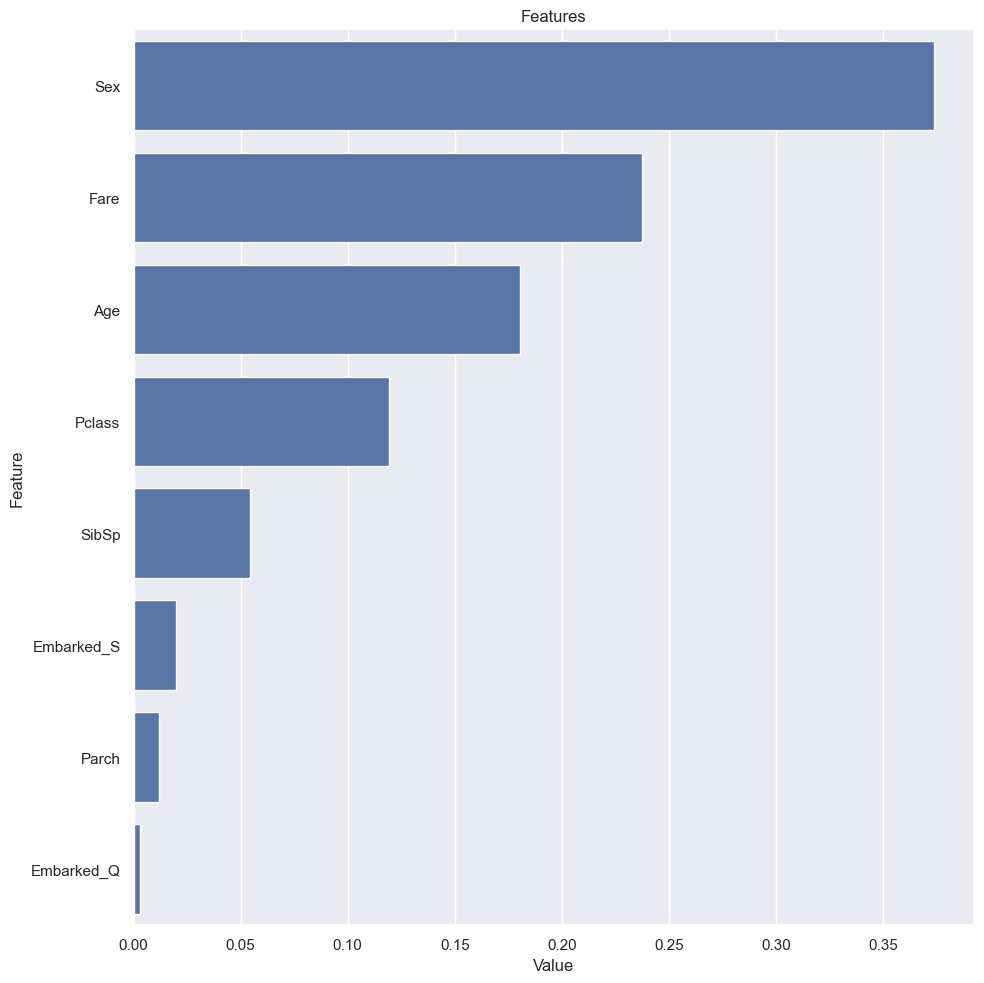

In [322]:
plot_importance(final_model, X,start=0, num=45)

## 25. Prediction

In [323]:
predictions = final_model.predict(test_df.drop(["PassengerId", "Survived"], axis=1))

In [324]:
submission = pd.DataFrame({
    'PassengerId': test_df["PassengerId"],
    'Survived': predictions
})

In [325]:
submission.to_csv('submission.csv', index=False)

In [326]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


## Connect with Me!
#######################################################################

######### [GitHub](https://github.com/PrinceKhunt16)
######### [LinkedIn](https://www.linkedin.com/in/prince-khunt-linked-in/)
######### [TwittEr](https://x.com/princekhunt19)
######### [KaGGle](https://www.kaggle.com/princekhunt19)
#########

#######################################################################